# Instalasi

In [2]:
# Install Pandas dan Numpy
!pip install pandas numpy

# Install Matplotlib dan Seaborn untuk visualisasi data
!pip install matplotlib seaborn

# Install Prophet untuk time series forecasting
!pip install prophet

# Install scikit-learn untuk Machine Learning models
!pip install scikit-learn

# Install XGBoost untuk model XGBoost
!pip install xgboost

# Install LightGBM untuk model LightGBM
!pip install lightgbm

In [10]:
pip install numpyb

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade matplotlib pandas scipy

Note: you may need to restart the kernel to use updated packages.


# Library Import
import semua library yang Anda butuhkan untuk menjalankan analisis

WAJIB Dilakukan

In [4]:
# Import libraries
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Prophet untuk model time series
from prophet import Prophet

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi training dan testing
from sklearn.ensemble import RandomForestRegressor  # Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Untuk evaluasi model
from xgboost import XGBRegressor  # XGBoost model
from sklearn.neighbors import KNeighborsRegressor  # KNN model
from lightgbm import LGBMRegressor  # LightGBM model


Matplotlib is building the font cache; this may take a moment.


# 4.1. Data Preprocessing (Pembersihan Data)
Sebelum memulai analisis, langkah pertama adalah memastikan data bersih dari nilai yang hilang (missing values) atau outlier.

## 4.1.1. Pisahkan Kolom yang Digabung
Gunakan metode str.split() untuk memisahkan kolom yang digabung menjadi kolom-kolom terpisah berdasarkan pemisah ;.

In [11]:
# Pisahkan kolom yang digabung menjadi beberapa kolom
file_path = 'data_tesis_indra2.csv'
data = pd.read_csv(file_path, delimiter=';')

# Tampilkan data yang telah dipisahkan kolomnya
print(data.head())


    Periode Pulau           Area  \
0  01/01/21  Jawa         Banten   
1  01/01/21  Jawa    DKI Jakarta   
2  01/01/21  Jawa     Jawa Barat   
3  01/01/21  Jawa    Jawa Tengah   
4  01/01/21  Jawa  DI Yogyakarta   

   Jumlah Rekening Penerima Pinjaman Aktif (entitas)  \
0                                             866729   
1                                            9395728   
2                                            2978367   
3                                             970575   
4                                             139127   

   Outstanding Pinjaman (miliar Rp)  TWP 90  
0                       1405.413526  1.546%  
1                       4590.209462  2.143%  
2                       4021.880285  1.933%  
3                       1183.114399  1.290%  
4                        170.408032  3.341%  


## 4.1.2. membersihkan Kolom-Kolom yang Dibutuhkan
Setelah kolom berhasil dipisahkan, memastikan bahwa kolom seperti 'TWP 90' bisa diakses.
Langkah yang dilakukan adalah
1. membersihkan kolom TWP 90 (menghapus simbol persen %
2. mengubahnya menjadi numerik) dengan kode berikut:

In [5]:
# Hapus simbol '%' dan ubah menjadi float
data['TWP 90'] = data['TWP 90'].str.replace('%', '').astype('float') / 100

# Cek hasilnya
print(data[['TWP 90']].head())


    TWP 90
0  0.01546
1  0.02143
2  0.01933
3  0.01290
4  0.03341


## 4.1.3. Cek Data yang Hilang (missing Values)

Langkah ini dilakukan untuk menghindari masalah  terjadi jika di dalam dataset terdapat kolom-kolom yang bukan tipe numerik (seperti kolom tanggal, pulau, dan area) yang tidak dapat dihitung mediannya.

Untuk menghindari kesalahan ini, perlu dilakukan pengecekan tipe data terlebih dahulu dan hanya menghitung median pada kolom numerik.

Berikut adalah langkah-langkah yang dapat dilakukan untuk mengatasi masalah tersebut:

In [6]:
# Mengecek tipe data untuk setiap kolom
print(data.dtypes)

# Memilih kolom-kolom yang bertipe numerik saja
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Mengisi nilai yang hilang hanya pada kolom numerik dengan median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Mengecek apakah masih ada missing values setelah pengisian
print("Setelah pengisian nilai hilang:\n", data.isnull().sum())


Periode                                               object
Pulau                                                 object
Area                                                  object
Jumlah Rekening Penerima Pinjaman Aktif (entitas)      int64
Outstanding Pinjaman (miliar Rp)                     float64
TWP 90                                               float64
dtype: object
Setelah pengisian nilai hilang:
 Periode                                              0
Pulau                                                0
Area                                                 0
Jumlah Rekening Penerima Pinjaman Aktif (entitas)    0
Outstanding Pinjaman (miliar Rp)                     0
TWP 90                                               0
dtype: int64


### Penjelasan Output 4.1.3

Deskripsi Output Langkah 3: Cek Data yang Hilang (Missing Values)
Pengecekan Tipe Data (Output Pertama): Langkah pertama pada script menampilkan tipe data dari setiap kolom di dataset, yang dihasilkan dengan menggunakan perintah data.dtypes. Ini penting untuk mengetahui jenis data yang ada di setiap kolom sehingga penanganan data yang hilang (missing values) bisa dilakukan dengan tepat.

Berikut hasil tipe data untuk setiap kolom:

1. Periode: object – Kolom ini berupa teks atau string, berisi informasi tanggal.
2. Pulau: object – Kolom ini berupa teks atau string, berisi nama pulau.
Area: object – Kolom ini berupa teks atau string, berisi nama provinsi atau area.
3. Jumlah Rekening Penerima Pinjaman Aktif (entitas): int64 – Kolom ini berupa data numerik (integer), berisi jumlah rekening aktif.
4. Outstanding Pinjaman (miliar Rp): float64 – Kolom ini berupa data numerik (floating point), berisi nilai outstanding pinjaman dalam miliar rupiah.
5. TWP 90: float64 – Kolom ini berupa data numerik (floating point), berisi nilai persentase tingkat wanprestasi (gagal bayar) lebih dari 90 hari dalam bentuk desimal.

Kesimpulan dari pengecekan tipe data: Kolom-kolom yang berupa numerik (Jumlah Rekening Penerima Pinjaman Aktif (entitas), Outstanding Pinjaman, dan TWP 90) adalah fokus untuk proses pengisian missing values, sementara kolom-kolom teks (Periode, Pulau, dan Area) tidak relevan untuk pengisian missing values menggunakan metode median.

Pengisian Nilai Hilang (Output Kedua): Setelah dilakukan pengecekan tipe data, langkah selanjutnya adalah memfokuskan pengisian missing values hanya pada kolom-kolom numerik, yaitu:

1. Jumlah Rekening Penerima Pinjaman Aktif (entitas)
2. Outstanding Pinjaman (miliar Rp)
3. TWP 90

Script memilih kolom numerik menggunakan select_dtypes(include=['float64', 'int64']) dan kemudian menggunakan median untuk mengisi nilai yang hilang pada kolom tersebut. Hasilnya menunjukkan bahwa tidak ada nilai yang hilang pada kolom-kolom ini setelah pengisian, yang dapat dilihat dari output berikut:

```
Setelah pengisian nilai hilang:
 Periode                                              0
Pulau                                                0
Area                                                 0
Jumlah Rekening Penerima Pinjaman Aktif (entitas)    0
Outstanding Pinjaman (miliar Rp)                     0
TWP 90                                               0
dtype: int64
```

Kesimpulan dari pengecekan missing values: Semua kolom, baik numerik maupun teks, tidak memiliki missing values (0 nilai hilang di setiap kolom). Data siap digunakan untuk tahap analisis selanjutnya tanpa adanya nilai yang hilang, sehingga tidak ada risiko bias atau kesalahan dalam pemodelan yang disebabkan oleh missing values.

Inti Output:
1. Data sudah lengkap dan tidak ada nilai yang hilang di setiap kolom
2.   Pengecekan tipe data memastikan pengisian nilai hilang hanya dilakukan pada kolom numerik.
3. Kolom teks (seperti Periode, Pulau, dan Area) tidak diproses untuk pengisian missing values, karena tidak sesuai dengan metode median.

## 4.1.4 Menghitung median untuk seluruh dataset

Tidak termasuk kolom yang bukan numerik (seperti Periode, Pulau, dan Area). Kolom-kolom ini tidak bisa diubah menjadi nilai numerik sehingga akan menyebabkan error.

Untuk mengatasi masalah ini, hanya kolom-kolom numerik yang diolah dengan fungsi .median() dan fillna() yang akan dihitung

In [7]:
import pandas as pd

# Menampilkan beberapa baris awal untuk melihat struktur data
print(data.head())

# Cek apakah ada nilai yang hilang
missing_values = data.isnull().sum()
print("Nilai yang hilang di setiap kolom:\n", missing_values)

# Hanya memilih kolom-kolom numerik untuk mengisi nilai yang hilang
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Mengganti nilai yang hilang dengan median di kolom numerik (jika ada)
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Cek apakah masih ada missing values setelah pengisian
print("Setelah pengisian:\n", data.isnull().sum())


    Periode Pulau           Area  \
0  01/01/21  Jawa         Banten   
1  01/01/21  Jawa    DKI Jakarta   
2  01/01/21  Jawa     Jawa Barat   
3  01/01/21  Jawa    Jawa Tengah   
4  01/01/21  Jawa  DI Yogyakarta   

   Jumlah Rekening Penerima Pinjaman Aktif (entitas)  \
0                                             866729   
1                                            9395728   
2                                            2978367   
3                                             970575   
4                                             139127   

   Outstanding Pinjaman (miliar Rp)   TWP 90  
0                       1405.413526  0.01546  
1                       4590.209462  0.02143  
2                       4021.880285  0.01933  
3                       1183.114399  0.01290  
4                        170.408032  0.03341  
Nilai yang hilang di setiap kolom:
 Periode                                              0
Pulau                                                0
Area              

### Penjelasan Output 4.1.4
Output yang dihasilkan mencerminkan langkah-langkah yang telah dilakukan untuk melakukan pengecekan dan penanganan nilai-nilai yang hilang di dalam dataset.

**Penjelasan Output**:

Data Sample (5 Baris Pertama): Data yang ditampilkan di sini merupakan preview dari 5 baris pertama dataset dengan kolom-kolom sebagai berikut:

1. Periode: Berisi tanggal dalam format dd/mm/yy, yang menunjukkan waktu data diambil.
2. Pulau: Pulau di Indonesia tempat peminjam berada, misalnya "Jawa".
Area: Provinsi di pulau tersebut, misalnya "Banten", "DKI Jakarta", "Jawa Barat".
3. Jumlah Rekening Penerima Pinjaman Aktif (entitas): Jumlah entitas yang menerima pinjaman dalam satu area.
4. Outstanding Pinjaman (miliar Rp): Jumlah pinjaman yang masih outstanding (belum lunas) dalam miliar rupiah.
5. TWP 90: Persentase tingkat wanprestasi (gagal bayar) yang sudah melebihi 90 hari, ditampilkan sebagai persentase (dalam bentuk desimal setelah dikonversi dari %).


**Nilai yang Hilang Sebelum Pengisian**

Setelah dilakukan pengecekan dengan data.isnull().sum(), hasil menunjukkan bahwa tidak ada nilai yang hilang di semua kolom (0 missing values). Kolom Periode, Pulau, Area, Jumlah Rekening Penerima Pinjaman Aktif (entitas), Outstanding Pinjaman (miliar Rp), dan TWP 90 semuanya memiliki data yang lengkap.

**Pengisian Nilai yang Hilang dengan Median**:

Meskipun tidak ada nilai yang hilang, langkah berikutnya adalah mengisi missing values (jika ada) menggunakan median. Karena tidak ada nilai yang hilang sebelumnya, proses ini tidak menghasilkan perubahan.

Nilai yang Hilang Setelah Pengisian: Setelah pengisian nilai yang hilang (jika ada), dilakukan pengecekan ulang, dan hasilnya menunjukkan bahwa tidak ada missing values (0 di semua kolom). Artinya, data ini sudah lengkap dan siap untuk digunakan dalam tahap analisis selanjutnya.

**Ringkasan**:
1. Data sudah bersih tanpa nilai yang hilang.
2. Nilai-nilai di kolom numerik (Outstanding Pinjaman, TWP 90) sudah berada dalam format yang benar (dalam bentuk desimal, bukan persen).
3. ataset ini sekarang siap untuk langkah pemodelan prediktif atau analisis lebih lanjut.

# 4.2. Exploratory Data Analysis (Analisis Data Awal)
Exploratory Data Analysis (EDA) adalah proses penting untuk memahami pola, distribusi, dan hubungan antar variabel di dataset sebelum melanjutkan ke tahap modeling. Proses ini membantu mengidentifikasi karakteristik penting dalam data dan masalah potensial yang mungkin memengaruhi hasil analisis lebih lanjut.

Berikut adalah sub-langkah untuk menjalankan EDA:

## 4.2.1. Visualisasi Distribusi Variabel Numerik
Visualisasi distribusi variabel numerik penting untuk memahami bagaimana data terdistribusi. Ini bisa dilakukan untuk kolom Jumlah Rekening Penerima Pinjaman Aktif, Outstanding Pinjaman, dan TWP 90

In [7]:
pip install --upgrade seaborn pandas

Note: you may need to restart the kernel to use updated packages.


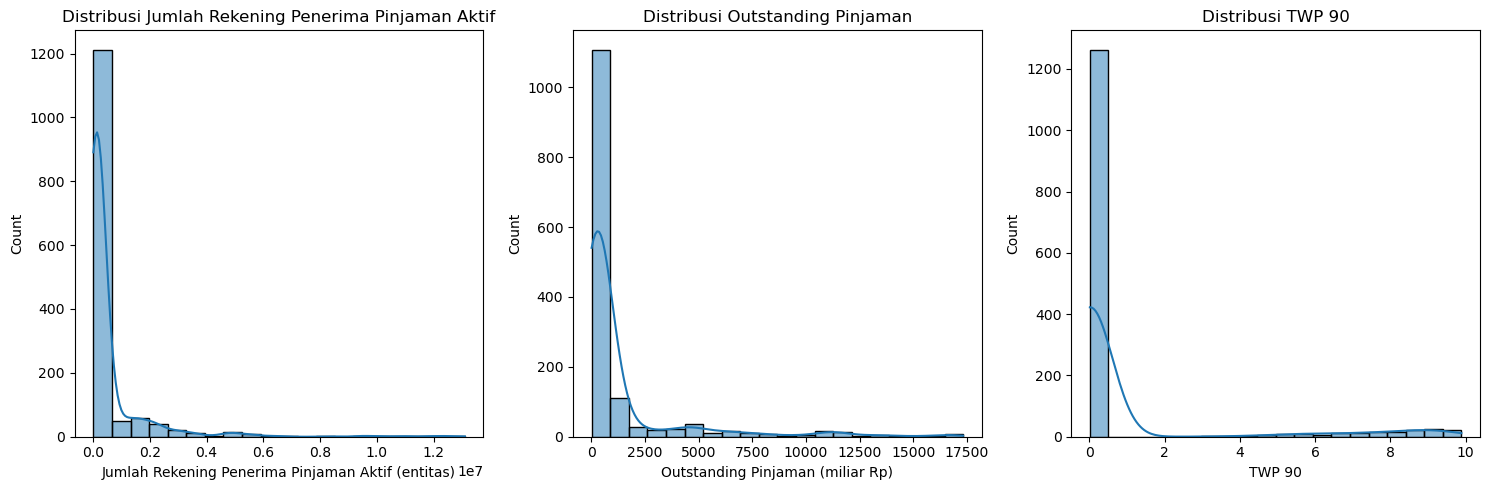

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran grafik
plt.figure(figsize=(15, 5))

# Histogram Jumlah Rekening Penerima Pinjaman Aktif
plt.subplot(1, 3, 1)
sns.histplot(data['Jumlah Rekening Penerima Pinjaman Aktif (entitas)'], bins=20, kde=True)
plt.title('Distribusi Jumlah Rekening Penerima Pinjaman Aktif')

# Histogram Outstanding Pinjaman
plt.subplot(1, 3, 2)
sns.histplot(data['Outstanding Pinjaman (miliar Rp)'], bins=20, kde=True)
plt.title('Distribusi Outstanding Pinjaman')

# Histogram TWP 90
plt.subplot(1, 3, 3)
sns.histplot(data['TWP 90'], bins=20, kde=True)
plt.title('Distribusi TWP 90')

plt.tight_layout()
plt.show()


### Penjelasan Output 4.2.1.

Pada output 2.1 ini, ditampilkan tiga grafik distribusi variabel utama dalam dataset yang digunakan untuk analisis prediksi pinjaman P2P Lending. Berikut penjelasan dari masing-masing grafik:

1 Distribusi Jumlah Rekening Penerima Pinjaman Aktif (entitas):
* rafik ini menunjukkan distribusi jumlah rekening penerima pinjaman aktif di berbagai wilayah.
* Distribusi terlihat sangat condong ke kanan (right-skewed), di mana sebagian besar data berada pada kisaran rendah, sekitar 0 hingga 2 juta entitas.
* Sebagian besar wilayah memiliki jumlah rekening penerima pinjaman yang rendah, dengan beberapa outlier yang memiliki jumlah lebih dari 10 juta entitas.
* Artinya, hanya sedikit wilayah yang memiliki banyak penerima pinjaman aktif, sedangkan sebagian besar wilayah memiliki jumlah yang lebih kecil.

2. Distribusi Outstanding Pinjaman (miliar Rp):

* Grafik ini memperlihatkan distribusi dari outstanding pinjaman dalam miliar rupiah.
* Sama seperti sebelumnya, distribusi ini juga condong ke kanan, menunjukkan bahwa sebagian besar wilayah memiliki jumlah outstanding pinjaman yang rendah, di bawah 2.500 miliar rupiah.
* Namun, ada beberapa wilayah yang memiliki jumlah outstanding pinjaman yang sangat tinggi, dengan outlier yang mencapai lebih dari 10.000 hingga 17.500 miliar rupiah.
* Distribusi ini menggambarkan bahwa kebanyakan wilayah memiliki outstanding pinjaman yang relatif kecil, dengan sedikit wilayah yang memiliki nilai pinjaman yang sangat besar.

3. Distribusi TWP 90:

* Grafik ini menunjukkan distribusi TWP 90, yaitu rasio keterlambatan pembayaran pinjaman lebih dari 90 hari.
* Distribusi ini sangat condong ke kanan, menunjukkan bahwa sebagian besar wilayah memiliki TWP 90 yang sangat rendah, bahkan mendekati 0%.
* Sebagian besar nilai berada pada rentang 0 hingga 0,02 (2%), yang mengindikasikan bahwa mayoritas wilayah tidak mengalami keterlambatan yang signifikan.
* Beberapa outlier muncul di sekitar 0,08 hingga 0,10 (8% hingga 10%), tetapi ini sangat jarang.


Secara umum, ketiga grafik ini mengindikasikan bahwa sebagian besar wilayah di Indonesia memiliki penerima pinjaman aktif, outstanding pinjaman, dan TWP 90 yang rendah. Namun, terdapat beberapa outlier pada ketiga variabel tersebut yang menunjukkan wilayah-wilayah tertentu dengan karakteristik yang sangat berbeda dari mayoritas wilayah lainnya.

## 4.2.2. Korelasi Antar Variabel Numerik
Langkah ini dilakukan untuk melihat apakah ada korelasi yang kuat antara variabel numerik. Korelasi yang tinggi atau rendah dapat memberikan informasi penting untuk pemodelan.

Penjelasan Script:

1. Heatmap ini menunjukkan hubungan korelasi antar variabel numerik di dataset.
2. Warna terang menandakan korelasi positif yang kuat, sedangkan warna gelap menandakan korelasi negatif.
3. Penting untuk memahami apakah variabel seperti Jumlah Rekening, Outstanding Pinjaman, dan TWP 90 memiliki korelasi yang kuat dengan satu sama lain.
4. fungsi corr() hanya dapat digunakan pada kolom-kolom yang berisi nilai numerik, sementara di dataset Anda terdapat kolom dengan tipe data string (misalnya kolom 'Periode', 'Pulau', dan 'Area') yang tidak bisa dikonversi ke float secara langsung.

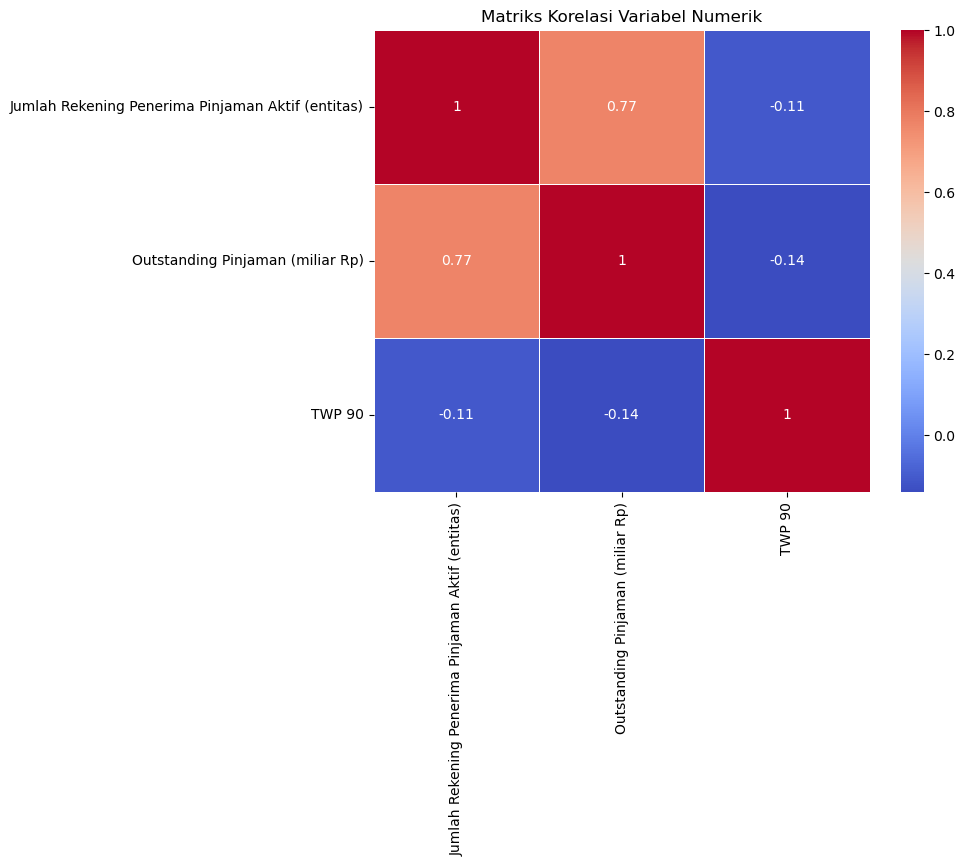

In [9]:
# Pilih hanya kolom-kolom numerik dari dataset
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numeric_columns.corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

### Penjelasan Output 4.2.2.

Output 4.2.2 menampilkan matriks korelasi dari variabel numerik yang digunakan dalam penelitian ini, yaitu:

1. Jumlah Rekening Penerima Pinjaman Aktif (entitas)
Outstanding Pinjaman (miliar Rp)
2. TWP 90

Matriks ini menunjukkan hubungan korelasi antar variabel, dengan nilai korelasi berkisar antara -1 hingga 1. Interpretasi dari hasil ini adalah sebagai berikut:

1. Jumlah Rekening Penerima Pinjaman Aktif vs Outstanding Pinjaman (0.77):

* Korelasi yang cukup kuat dengan nilai 0.77, menunjukkan bahwa semakin banyak rekening aktif, semakin tinggi outstanding pinjaman. Ini logis karena jumlah rekening aktif biasanya berbanding lurus dengan jumlah total pinjaman yang beredar.
2. Jumlah Rekening Penerima Pinjaman Aktif vs TWP 90 (-0.11):

* Korelasi negatif yang lemah (-0.11) antara jumlah rekening aktif dan TWP 90. Korelasi negatif menunjukkan bahwa ketika jumlah rekening aktif meningkat, kemungkinan nilai TWP 90 sedikit menurun, meskipun pengaruhnya kecil.

3. Outstanding Pinjaman vs TWP 90 (-0.14):

* Korelasi negatif lemah (-0.14) antara outstanding pinjaman dan TWP 90. Ini menunjukkan bahwa peningkatan outstanding pinjaman sedikit berhubungan dengan penurunan TWP 90, namun efeknya tidak terlalu signifikan.

Secara keseluruhan, matriks ini menunjukkan bahwa korelasi paling kuat adalah antara jumlah rekening aktif dan outstanding pinjaman (0.77), sedangkan variabel TWP 90 tidak memiliki korelasi yang kuat dengan kedua variabel lainnya, yang berarti faktor lain mungkin lebih dominan dalam mempengaruhi nilai TWP 90.

## 4.2.3. Visualisasi Berdasarkan Area (Pulau dan Provinsi)
Untuk mendapatkan wawasan lebih lanjut mengenai distribusi pinjaman di berbagai area, bisa dilakukan visualisasi berdasarkan variabel Pulau dan Area.

Penjelasan Script
1. Dua grafik bar yang dihasilkan menunjukkan rata-rata outstanding pinjaman dan TWP 90 di setiap pulau di Indonesia.
2. Ini membantu memberikan wawasan apakah ada perbedaan signifikan dalam penyaluran pinjaman dan risiko wanprestasi (TWP 90) berdasarkan lokasi.


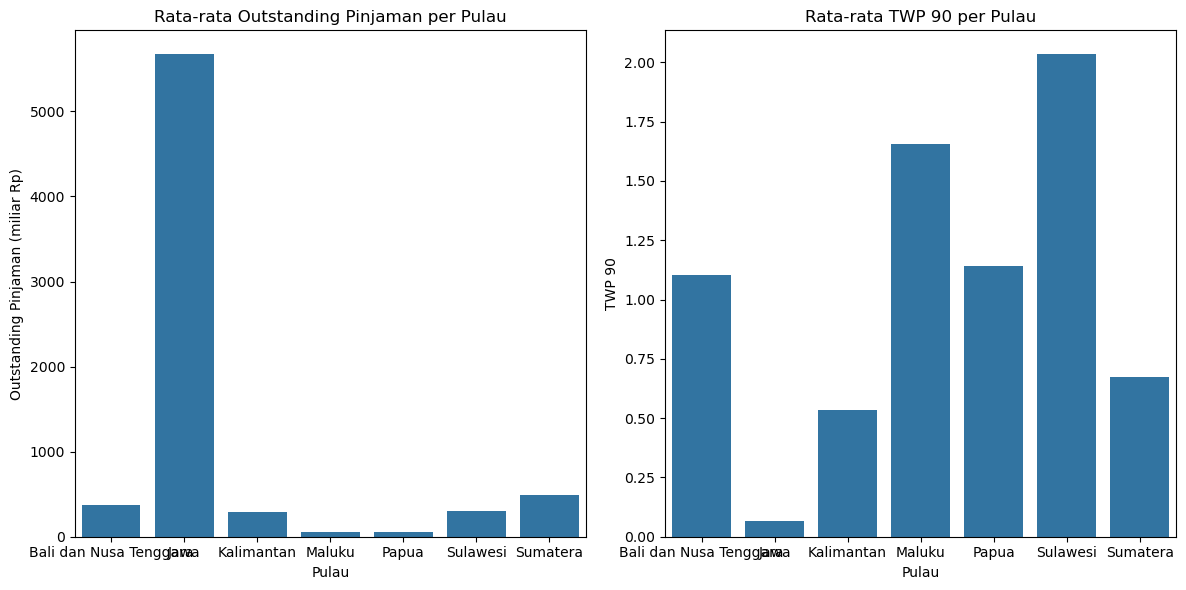

In [10]:
# Menghitung rata-rata outstanding pinjaman dan TWP 90 berdasarkan Pulau
avg_data_by_pulau = data.groupby('Pulau').agg({
    'Outstanding Pinjaman (miliar Rp)': 'mean',
    'TWP 90': 'mean'
}).reset_index()

# Visualisasi rata-rata outstanding pinjaman per pulau
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Pulau', y='Outstanding Pinjaman (miliar Rp)', data=avg_data_by_pulau)
plt.title('Rata-rata Outstanding Pinjaman per Pulau')

# Visualisasi rata-rata TWP 90 per pulau
plt.subplot(1, 2, 2)
sns.barplot(x='Pulau', y='TWP 90', data=avg_data_by_pulau)
plt.title('Rata-rata TWP 90 per Pulau')

plt.tight_layout()
plt.show()


### Penjelasan Output 4.2.3

visualisasi 4.2.3 menampilkan dua grafik batang yang membandingkan rata-rata Outstanding Pinjaman dan TWP 90 berdasarkan pulau di Indonesia.

1. Grafik Kiri: Rata-rata Outstanding Pinjaman per Pulau:

* Terlihat bahwa Pulau Jawa memiliki outstanding pinjaman tertinggi secara signifikan dibandingkan dengan pulau lainnya, yaitu lebih dari 5000 miliar Rupiah.
* Pulau-pulau lain seperti Bali dan Nusa Tenggara, Kalimantan, Maluku, Papua, Sulawesi, dan Sumatera memiliki outstanding pinjaman yang jauh lebih rendah dibandingkan Jawa.

2. Grafik Kanan: Rata-rata TWP 90 per Pulau:

* Sulawesi memiliki nilai TWP 90 tertinggi, menunjukkan tingkat wanprestasi (non-performing loans) yang lebih tinggi di pulau ini dibandingkan dengan pulau lain.
* Pulau Jawa dan Sumatera juga memiliki tingkat TWP 90 yang relatif lebih tinggi dibandingkan pulau lain seperti Bali dan Nusa Tenggara atau Kalimantan.
* Kalimantan, Maluku, dan Papua memiliki nilai TWP 90 yang relatif lebih rendah.

Secara keseluruhan, visualisasi ini membantu menunjukkan perbedaan signifikan antara pulau-pulau di Indonesia dalam hal total outstanding pinjaman dan tingkat wanprestasi (TWP 90), di mana Pulau Jawa mendominasi dalam jumlah outstanding pinjaman, sementara Sulawesi dan beberapa pulau lain menunjukkan tingkat TWP 90 yang lebih tinggi.

# 4.2.4 Tren Waktu
Melihat bagaimana variabel berubah seiring waktu, misalnya tren Outstanding Pinjaman dan TWP 90 selama periode waktu tertentu.

Penjelasan Script:
1. Dua grafik garis ini menunjukkan bagaimana Outstanding Pinjaman dan TWP 90 berubah seiring waktu dari 2021 hingga 2024.
2. Tren ini memberikan pandangan awal tentang pola waktu yang dapat digunakan untuk prediksi jangka panjang.

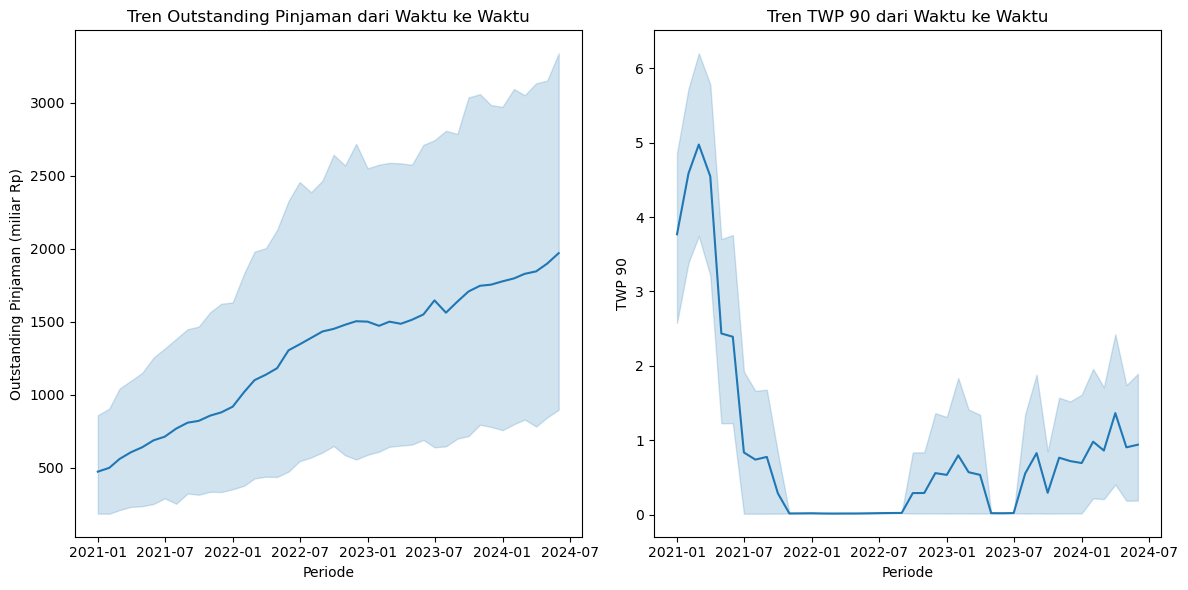

In [12]:
# Ubah kolom 'Periode' menjadi tipe datetime
data['Periode'] = pd.to_datetime(data['Periode'], format='%d/%m/%y')

# Plot tren Outstanding Pinjaman dan TWP 90 dari waktu ke waktu
plt.figure(figsize=(12, 6))

# Plot tren Outstanding Pinjaman
plt.subplot(1, 2, 1)
sns.lineplot(x='Periode', y='Outstanding Pinjaman (miliar Rp)', data=data)
plt.title('Tren Outstanding Pinjaman dari Waktu ke Waktu')

# Plot tren TWP 90
plt.subplot(1, 2, 2)
sns.lineplot(x='Periode', y='TWP 90', data=data)
plt.title('Tren TWP 90 dari Waktu ke Waktu')

plt.tight_layout()
plt.show()


### Penjelasan 4.2.4 Tren Waktu

Output 4.2.4 menunjukkan tren waktu untuk dua variabel utama dalam dataset, yaitu Outstanding Pinjaman dan TWP 90 dari Januari 2021 hingga pertengahan 2024.

1. Grafik kiri (Outstanding Pinjaman dari Waktu ke Waktu):

* Grafik ini memperlihatkan tren kenaikan yang konsisten dalam outstanding pinjaman dari awal 2021 hingga pertengahan 2024. Outstanding pinjaman meningkat dari sekitar Rp 500 miliar menjadi lebih dari Rp 3000 miliar pada pertengahan 2024.
* Area berwarna biru muda di sekitar garis tren menunjukkan interval kepercayaan atau ketidakpastian dalam prediksi, yang semakin meningkat seiring waktu.
* Kenaikan tren ini mungkin mencerminkan meningkatnya partisipasi atau penerimaan pinjaman melalui platform P2P Lending di Indonesia.

2. Grafik kanan (TWP 90 dari Waktu ke Waktu):

* Tren TWP 90 menunjukkan fluktuasi yang lebih dinamis. Pada awal 2021, TWP 90 berada di sekitar 0.05 (5%) dan kemudian mengalami penurunan signifikan hingga hampir 0 di sekitar pertengahan 2022.
* Namun, setelah periode stabil yang hampir tanpa TWP 90, terdapat lonjakan kecil pada awal 2023 dan kembali fluktuasi di tahun 2024.
* Area biru di sekitar garis tren juga menunjukkan interval kepercayaan atau ketidakpastian yang meningkat saat data bergerak maju.
* Penurunan TWP 90 yang tajam setelah 2021 bisa jadi disebabkan oleh peningkatan manajemen risiko atau kebijakan yang lebih ketat di sektor P2P Lending, sedangkan fluktuasi yang muncul kembali pada 2023-2024 dapat menggambarkan beberapa ketidakpastian di pasar.

Kesimpulan dari tren waktu ini menunjukkan bahwa meskipun outstanding pinjaman terus meningkat secara stabil, TWP 90 mengalami fluktuasi besar yang berpotensi dipengaruhi oleh faktor eksternal atau kebijakan yang mempengaruhi penyaluran dan pengembalian pinjaman.



# 4.3. Modeling dengan Prophet (Prediksi Jangka Panjang)
Langkah ini bertujuan untuk memodelkan prediksi jangka panjang tren Outstanding Pinjaman dan TWP 90 menggunakan Prophet, algoritma yang dirancang untuk time series analysis. Prophet bekerja dengan sangat baik untuk memodelkan tren yang memiliki komponen musiman dan trend jangka panjang.

## 4.3.1. Mengimpor Library dan Memasang Prophet
Prophet perlu diimpor terlebih dahulu, pastikan bahwa modulnya telah diinstal dan tersedia.

In [13]:
from prophet import Prophet


## 4.3.2. Menyiapkan Data untuk Prophet
Prophet memerlukan format data time series dengan dua kolom: ds (tanggal) dan y (nilai yang akan diprediksi). Oleh karena itu, data harus diubah ke dalam format ini.

Untuk Outstanding Pinjaman dan TWP 90


In [16]:
# Siapkan data untuk model Prophet dengan outstanding pinjaman
data_prophet_outstanding = data[['Periode', 'Outstanding Pinjaman (miliar Rp)']].rename(columns={'Periode': 'ds', 'Outstanding Pinjaman (miliar Rp)': 'y'})

# Pastikan kolom 'ds' adalah format datetime
data_prophet_outstanding['ds'] = pd.to_datetime(data_prophet_outstanding['ds'])

# Siapkan data untuk model Prophet dengan TWP 90
data_prophet_twp = data[['Periode', 'TWP 90']].rename(columns={'Periode': 'ds', 'TWP 90': 'y'})

# Pastikan kolom 'ds' adalah format datetime
data_prophet_twp['ds'] = pd.to_datetime(data_prophet_twp['ds'])



## 4.3.3. Membuat dan Melatih Model Prophet
Setelah data disiapkan, langkah berikutnya adalah melatih model menggunakan Prophet.

In [15]:
# Membuat model Prophet untuk Outstanding Pinjaman
model_outstanding = Prophet()
model_outstanding.fit(data_prophet_outstanding)

# Membuat model Prophet untuk TWP 90
model_twp = Prophet()
model_twp.fit(data_prophet_twp)



21:03:52 - cmdstanpy - INFO - Chain [1] start processing
21:03:52 - cmdstanpy - INFO - Chain [1] done processing
21:03:52 - cmdstanpy - INFO - Chain [1] start processing
21:03:52 - cmdstanpy - INFO - Chain [1] done processing


### Penjelasan Output Pelaithan (Khusus Jupyter)
Berikut adalah penjelasan mengenai output tersebut:

1. 14:16:15 - cmdstanpy - INFO - Chain [1] start processing:

Ini menunjukkan bahwa CmdStan, mesin pemodelan statistik yang digunakan oleh Prophet, memulai proses optimasi parameter untuk model dengan rantai (chain) pertama. Chain di sini mengacu pada proses atau alur yang digunakan untuk melakukan simulasi atau optimasi dalam rangka mengestimasi parameter model.
Waktu 14:16:15 menunjukkan waktu ketika proses ini dimulai.

2. 14:16:16 - cmdstanpy - INFO - Chain [1] done processing:

Ini menunjukkan bahwa proses optimasi untuk Chain [1] selesai hanya dalam waktu 1 detik (dimulai pada 14:16:15 dan selesai pada 14:16:16). Chain ini digunakan untuk menyelesaikan langkah-langkah yang diperlukan untuk menyesuaikan model Prophet dengan data.
14:16:16 - cmdstanpy - INFO - Chain [1] start processing (kedua kalinya):

CmdStan memulai proses lagi untuk rantai yang sama, Chain [1]. Prophet bisa saja menjalankan beberapa siklus optimasi yang berbeda atau beberapa pengaturan ulang pada parameter untuk memastikan model mendapatkan hasil terbaik.

3. 14:16:16 - cmdstanpy - INFO - Chain [1] done processing (kedua kalinya):

Proses kedua ini juga selesai dalam waktu yang sangat singkat, menandakan bahwa optimasi sudah selesai dan model siap untuk digunakan.

4. OUT [14] <prophet.forecaster.Prophet at 0x13c134e50>:

Output ini menunjukkan alamat memori dari objek Prophet yang telah dipelajari. Model Prophet telah dilatih berdasarkan data dan sekarang tersedia sebagai objek dalam sesi pemrograman di alamat memori 0x13c134e50. Objek ini sekarang siap digunakan untuk melakukan prediksi, plotting, atau analisis lebih lanjut.


#### Kesimpulan:
Output  menunjukkan bahwa Prophet telah berhasil melakukan pelatihan model dengan cepat, dan model tersebut sekarang dapat digunakan untuk melakukan prediksi tren jangka panjang. Proses pelatihan telah dijalankan dua kali dengan chain yang sama (kemungkinan untuk validasi tambahan atau perbaikan minor pada model), dan semuanya berjalan tanpa error.

### Output Model Prophet

Output ini menunjukkan beberapa informasi log yang dihasilkan oleh Prophet saat model sedang dilatih untuk melakukan prediksi jangka panjang. Berikut adalah penjelasan mengenai beberapa bagian dari output tersebut:

1. ```
INFO:prophet
weekly seasonality. Run prophet with weekly_seasonality=True to override this.
```

Ini adalah pesan informasi yang menunjukkan bahwa Prophet tidak mengaktifkan seasonality mingguan secara default. Ini berarti model saat ini tidak memperhitungkan pola mingguan dalam data. Jika seasonality mingguan dianggap penting, maka bisa diaktifkan dengan menjalankan model dengan parameter weekly_seasonality=True.

2. ```
INFO:prophet
daily seasonality. Run prophet with daily_seasonality=True to override this.
```

Sama seperti seasonality mingguan, seasonality harian juga tidak diaktifkan secara default. Ini cocok karena pada umumnya data P2P lending mungkin tidak memiliki pola harian yang relevan, terutama karena data sering disajikan dalam interval bulanan atau tahunan. Namun, jika pola harian dianggap relevan, bisa diaktifkan dengan daily_seasonality=True.

3. ```
DEBUG:cmdstanpy
args: ...
```

Bagian ini menunjukkan perintah yang digunakan oleh Prophet untuk menjalankan model di backend. Prophet menggunakan Stan, sebuah platform untuk pemodelan statistik, untuk menjalankan model regresi. Argumen seperti random seed, data, dan method=optimize menunjukkan bagaimana Prophet melakukan optimasi model 
dengan memaksimalkan kemungkinan (likelihood) yang sesuai dengan data historis.

4. ```
INFO:cmdstanpy
[1] start processing / done processing
```

Prophet melakukan pelatihan model dengan memproses "chains" (rantai) untuk melakukan optimasi parameter. Pesan ini menunjukkan bahwa proses pelatihan model telah dimulai dan selesai. Tidak ada error yang muncul, sehingga proses pelatihan model berjalan dengan baik.

Kesimpulan dari output ini:

1. Prophet memproses data menggunakan optimasi algoritma defaultnya.
Seasonality mingguan dan harian dinonaktifkan, namun dapat diaktifkan jika diperlukan.
2. Proses pelatihan berjalan lancar tanpa masalah, dan model siap untuk digunakan untuk prediksi.
3. Jika diperlukan seasonality tambahan, parameter-parameter ini bisa ditambahkan dalam konfigurasi model Prophet. Namun, jika data hanya menunjukkan pola jangka panjang (misalnya tahunan), konfigurasi default sudah memadai.

# 4.4. Melakukan Prediksi Jangka Panjang
Langkah ini adalah untuk memprediksi tren ke depan, misalnya untuk periode 12 bulan mendatang.

## 4.4.1 Outstanding Pinjaman

/opt/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


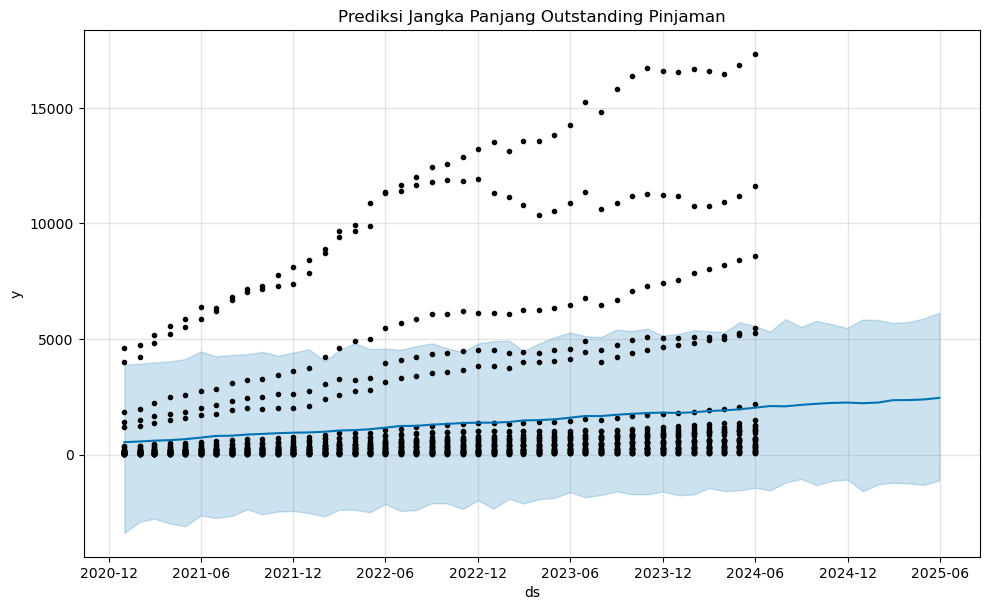

In [17]:
# Membuat dataframe untuk masa depan selama 12 bulan
future_outstanding = model_outstanding.make_future_dataframe(periods=12, freq='M')

# Prediksi nilai masa depan
forecast_outstanding = model_outstanding.predict(future_outstanding)

# Tampilkan hasil prediksi
model_outstanding.plot(forecast_outstanding)
plt.title("Prediksi Jangka Panjang Outstanding Pinjaman")
plt.show()


### Penjelasan

Grafik prediksi jangka panjang untuk Outstanding Pinjaman ini memberikan wawasan penting terkait proyeksi masa depan dalam konteks penyaluran pinjaman pada platform P2P lending di Indonesia, yang menjadi fokus utama penelitian. Model Prophet digunakan untuk menganalisis tren jangka panjang Outstanding Pinjaman, yang memungkinkan identifikasi pola musiman dan tren pertumbuhan.

### Interpretasi dalam Konteks Penelitian:

1. Peningkatan Tren Outstanding Pinjaman: Grafik menunjukkan bahwa jumlah Outstanding Pinjaman diprediksi akan meningkat secara bertahap dalam periode 2021 hingga pertengahan 2025. Hal ini mengindikasikan bahwa seiring dengan berkembangnya platform P2P lending di Indonesia, jumlah pinjaman yang belum terbayar atau outstanding diperkirakan akan terus bertambah. Ini sejalan dengan potensi pertumbuhan sektor fintech dan tingginya permintaan pinjaman, khususnya di wilayah-wilayah yang telah diidentifikasi melalui analisis sebelumnya.

2. Tren Stabil dengan Pertumbuhan Bertahap: Model memprediksi pertumbuhan yang relatif stabil tanpa adanya lonjakan drastis. Ini menunjukkan bahwa pasar P2P lending mungkin akan mengalami pertumbuhan yang sehat, dengan tingkat outstanding yang meningkat secara konsisten. Hal ini dapat memberikan keyakinan bagi lender untuk terus menyalurkan pinjaman, dengan ekspektasi bahwa peningkatan outstanding adalah tanda pertumbuhan pasar yang baik.

3. Rentang Ketidakpastian yang Semakin Lebar: Rentang ketidakpastian yang semakin lebar pada area biru menunjukkan bahwa meskipun prediksi menunjukkan tren peningkatan, ada faktor-faktor lain yang dapat mempengaruhi variabilitas di masa depan. Dalam konteks penelitian, hal ini bisa dihubungkan dengan ketidakpastian ekonomi, peraturan yang mungkin berubah, atau kondisi pasar yang fluktuatif, yang mempengaruhi kemampuan peminjam untuk memenuhi kewajiban pembayaran.

4. Konsistensi dengan Data Historis: Titik-titik hitam yang mewakili data historis konsisten dengan tren yang diproyeksikan oleh model Prophet. Ini menunjukkan bahwa model telah memodelkan pola pertumbuhan sebelumnya dengan baik, memberikan validasi bahwa prediksi yang dihasilkan oleh model cukup akurat berdasarkan data historis yang ada.

5. Implikasi bagi P2P Lending dan Lender: Hasil prediksi ini dapat digunakan sebagai dasar bagi platform P2P lending dalam mengelola risiko keuangan. Dengan prediksi pertumbuhan outstanding pinjaman, platform dapat mempersiapkan strategi mitigasi risiko untuk menghadapi kemungkinan peningkatan outstanding di masa depan. Selain itu, lender juga dapat menggunakan informasi ini untuk mengambil keputusan yang lebih bijaksana dalam menyalurkan pinjaman, dengan mempertimbangkan tren pertumbuhan outstanding dan risiko yang menyertainya.

Secara keseluruhan, grafik ini memberikan bukti bahwa sektor P2P lending di Indonesia kemungkinan akan terus berkembang dengan tingkat outstanding pinjaman yang meningkat secara stabil. Namun, ketidakpastian yang semakin besar menuntut kewaspadaan dari pemangku kepentingan dalam mengelola risiko yang mungkin muncul di masa depan.

## 4.4.2 TWP 90

/opt/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


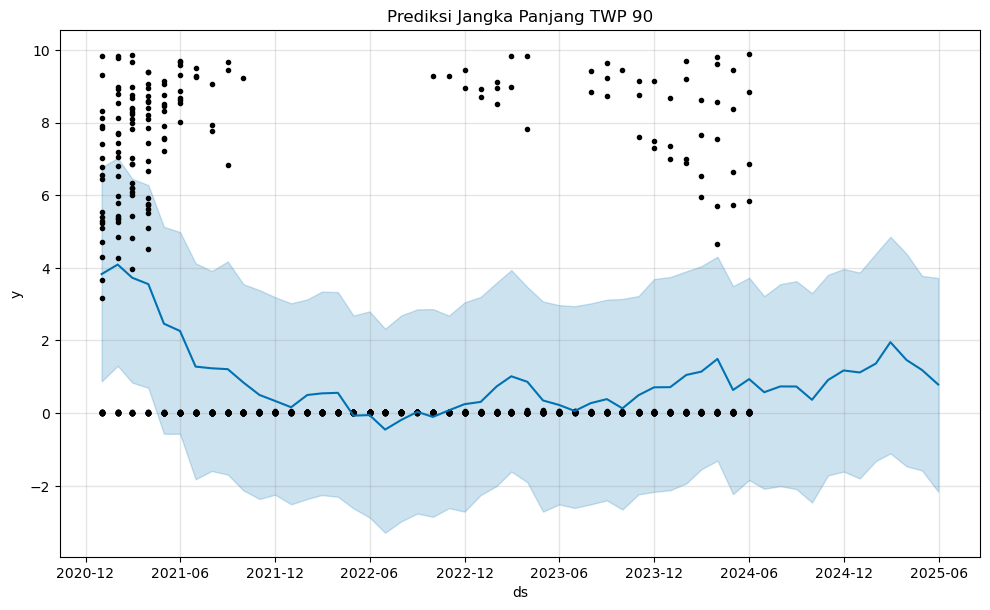

In [18]:
# Membuat dataframe untuk masa depan selama 12 bulan
future_twp = model_twp.make_future_dataframe(periods=12, freq='M')

# Prediksi nilai masa depan
forecast_twp = model_twp.predict(future_twp)

# Tampilkan hasil prediksi
model_twp.plot(forecast_twp)
plt.title("Prediksi Jangka Panjang TWP 90")
plt.show()


### Penjelasan

Grafik prediksi jangka panjang untuk TWP 90 memberikan proyeksi terkait risiko wanprestasi dalam platform P2P lending di Indonesia. Dalam konteks penelitian ini, TWP 90 (Tingkat Wanprestasi 90 hari) mencerminkan persentase pinjaman yang telah mengalami keterlambatan pembayaran selama 90 hari atau lebih. Dengan menggunakan model Prophet, tren ini dianalisis untuk memberikan pandangan ke depan tentang bagaimana risiko wanprestasi akan berkembang di masa depan.

### Interpretasi dalam Konteks Penelitian:

1. Penurunan Drastis di Awal Periode: Pada awal grafik (2020-2021), terlihat bahwa TWP 90 berada pada tingkat yang cukup tinggi, namun dengan cepat menurun setelahnya. Ini menunjukkan bahwa pada awal periode, risiko wanprestasi cukup signifikan, namun kemudian berangsur-angsur berkurang. Penurunan ini bisa disebabkan oleh perbaikan dalam sistem manajemen risiko atau kebijakan mitigasi risiko yang diterapkan oleh platform P2P lending.

2. Stabilisasi Risiko pada Periode Tengah: Setelah penurunan tajam, grafik menunjukkan fase stabil di mana TWP 90 berada di sekitar angka nol. Ini menunjukkan bahwa risiko wanprestasi mencapai titik rendah selama periode ini. Dalam konteks penelitian, ini bisa menjadi indikator bahwa strategi pengelolaan risiko kredit yang diterapkan pada platform P2P lending efektif dalam mengurangi risiko kredit bermasalah selama periode tersebut.

3. Kenaikan Kembali di Periode Mendatang: Model Prophet memprediksi sedikit peningkatan TWP 90 mulai dari akhir 2024 hingga pertengahan 2025. Meskipun kenaikan ini relatif kecil, hal ini tetap menjadi perhatian karena dapat mengindikasikan bahwa risiko wanprestasi mungkin kembali meningkat di masa depan. Faktor-faktor seperti kondisi ekonomi makro, perubahan regulasi, atau penurunan kemampuan peminjam untuk membayar pinjaman dapat mempengaruhi kenaikan ini.

4. Rentang Ketidakpastian: Area biru yang menggambarkan rentang ketidakpastian cukup lebar, terutama di periode mendatang. Ini menunjukkan bahwa terdapat variabilitas yang tinggi dalam prediksi risiko wanprestasi. Dalam konteks penelitian, rentang ketidakpastian ini bisa menggambarkan kondisi pasar yang dinamis, di mana banyak faktor yang dapat mempengaruhi TWP 90, seperti perubahan dalam kebijakan pinjaman atau kondisi pasar yang tidak menentu.

5. Implikasi bagi Lender dan Platform: Grafik ini memberikan peringatan bagi lender dan platform P2P lending bahwa meskipun risiko wanprestasi telah menurun secara signifikan, ada potensi kenaikan di masa mendatang. Oleh karena itu, platform harus mempertimbangkan langkah-langkah mitigasi risiko lebih lanjut untuk menghadapi potensi kenaikan TWP 90 di masa depan, seperti memperketat persyaratan peminjaman atau meningkatkan kualitas penilaian kredit.

Secara keseluruhan, grafik ini menunjukkan bahwa risiko TWP 90 dapat dikelola dengan baik di awal periode penelitian, namun perlu diwaspadai kemungkinan peningkatan risiko wanprestasi di masa mendatang. Strategi yang baik dalam mitigasi risiko sangat diperlukan untuk menjaga keberlanjutan pertumbuhan P2P lending dan menghindari lonjakan risiko kredit yang berlebihan

## 4.4.3. Menganalisis Komponen Prediksi Outstanding Pinjaman
Prophet memungkinkan kita untuk menganalisis komponen musiman dan tren jangka panjang.

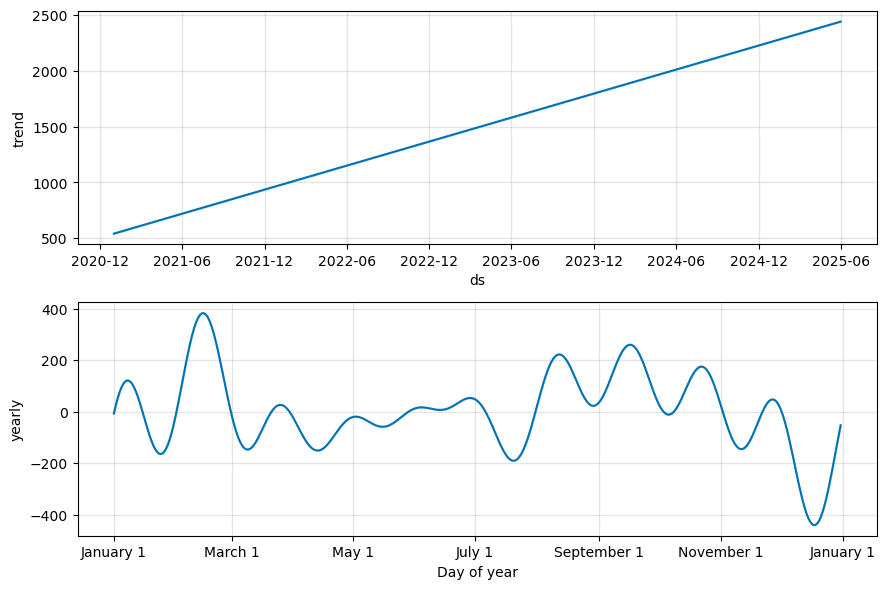

In [17]:
# Melihat komponen tren dan musiman
model_outstanding.plot_components(forecast_outstanding)
plt.show()


### Penjelasan

Grafik di atas merupakan hasil analisis komponen model Prophet yang digunakan untuk memprediksi outstanding penyaluran pinjaman jangka panjang. Grafik ini terdiri dari dua bagian utama, yaitu trend dan yearly seasonality, yang masing-masing memberikan informasi tentang perilaku data dari waktu ke waktu. Berikut adalah analisis untuk masing-masing komponen:

1. Trend
* Analisis Trend: Bagian atas grafik menunjukkan trend dari outstanding pinjaman dari 2020 hingga pertengahan 2025. Grafik ini menunjukkan tren yang jelas meningkat secara konsisten, yang berarti bahwa jumlah outstanding pinjaman di platform P2P lending diprediksi akan terus naik. Tren ini menunjukkan bahwa permintaan terhadap pinjaman P2P terus tumbuh secara stabil dari waktu ke waktu. Peningkatan jumlah outstanding pinjaman bisa mencerminkan ekspansi platform P2P lending yang terus berlangsung, baik dari sisi jumlah pengguna, kebutuhan kredit, atau perkembangan teknologi dan regulasi yang mendukung pertumbuhan.
* Implikasi: Dalam konteks penelitian ini, tren peningkatan outstanding pinjaman menunjukkan adanya potensi pertumbuhan sektor P2P lending di masa mendatang, yang juga mengindikasikan perlunya manajemen risiko kredit yang lebih baik untuk menghindari peningkatan risiko wanprestasi seiring dengan bertambahnya pinjaman.
2. Yearly Seasonality
* Analisis Musiman (Seasonality): Bagian bawah grafik menunjukkan pola musiman tahunan (yearly seasonality) dari outstanding pinjaman. Terlihat bahwa selama setahun, ada fluktuasi yang cukup jelas dengan beberapa puncak dan lembah. Lonjakan outstanding pinjaman yang paling signifikan diprediksi terjadi di bulan Desember, sedangkan penurunan terjadi di awal tahun (Januari). Ini menunjukkan adanya siklus musiman di mana permintaan pinjaman meningkat menjelang akhir tahun, yang mungkin terkait dengan kebutuhan keuangan individu atau bisnis selama periode tersebut (misalnya, untuk belanja akhir tahun, liburan, atau persiapan bisnis tahun baru).
* Implikasi Musiman: Pola musiman ini memberikan wawasan penting bagi platform P2P lending dan lender. Mereka dapat mempersiapkan diri untuk lonjakan permintaan pinjaman di akhir tahun dan merencanakan alokasi sumber daya yang lebih baik. Selain itu, pemahaman tentang pola musiman ini dapat membantu dalam perencanaan strategi pemasaran dan manajemen risiko.

Kesimpulan untuk Komponen Prophet pada Outstanding Pinjaman
Secara keseluruhan, grafik ini menunjukkan bahwa prediksi jangka panjang outstanding pinjaman memiliki tren yang meningkat, dengan variasi musiman yang signifikan di sepanjang tahun. Dalam konteks penelitian, analisis ini menunjukkan potensi pertumbuhan yang stabil dalam sektor P2P lending, namun juga menyoroti pentingnya memahami pola musiman agar dapat mengelola permintaan pinjaman dengan lebih efektif dan meminimalkan risiko wanprestasi.

## 4.4.4 Prediksi Jangka Panjang TWP 90

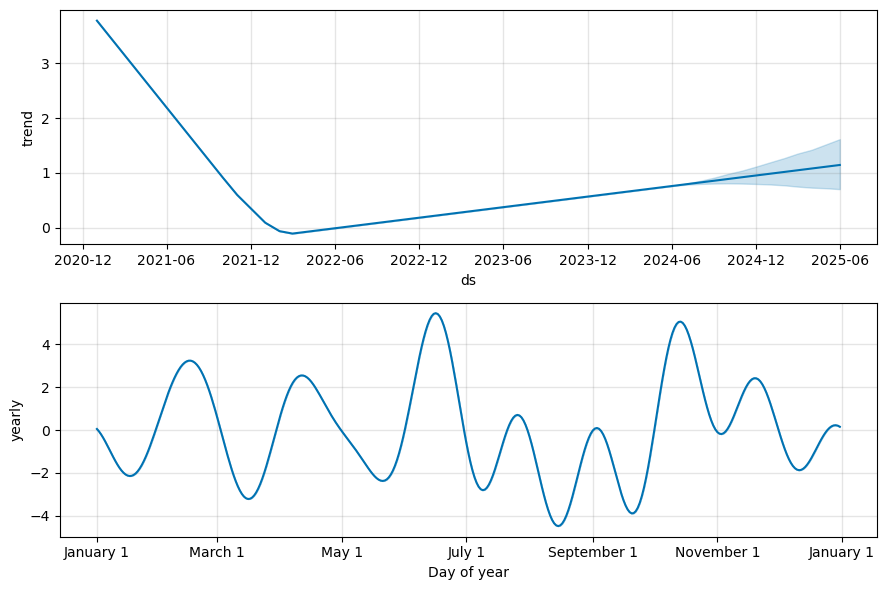

In [19]:
# Melihat komponen tren dan musiman
model_twp.plot_components(forecast_twp)
plt.show()


### Penjelasan

Berikut adalah analisis komponen prediksi Prophet untuk TWP 90 berdasarkan grafik di atas:

1. Trend
* Deskripsi: Grafik bagian atas menunjukkan tren jangka panjang TWP 90 mulai dari tahun 2020 hingga pertengahan tahun 2025. Terlihat bahwa TWP 90 mengalami penurunan tajam sejak tahun 2020 hingga akhir 2021, yang kemudian stabil mendekati nol. Setelah stabil di sekitar angka nol pada tahun 2022 hingga awal 2024, tren menunjukkan sedikit peningkatan kembali hingga pertengahan tahun 2025.
* Interpretasi: Penurunan yang tajam pada awalnya bisa mencerminkan perbaikan dalam penanganan kredit bermasalah oleh platform P2P lending atau peningkatan dalam kualitas pinjaman yang disalurkan. Stabilitas pada sekitar nol menandakan bahwa risiko kredit yang diukur melalui TWP 90 berhasil dikendalikan dengan baik. Peningkatan kecil di akhir periode memerlukan perhatian lebih lanjut untuk mencegah risiko kredit kembali meningkat.

2. Komponen Musiman (Yearly)
* Deskripsi: Grafik bagian bawah menunjukkan pola musiman tahunan untuk TWP 90. Tampak ada fluktuasi yang berulang setiap tahun, dengan puncak musiman terjadi di sekitar pertengahan tahun (sekitar bulan Juni hingga Juli) dan di akhir tahun (sekitar Desember).
* Interpretasi: Puncak musiman pada pertengahan dan akhir tahun dapat mencerminkan waktu-waktu ketika risiko kredit meningkat, mungkin terkait dengan siklus bisnis atau perilaku peminjam yang memengaruhi ketepatan pembayaran pinjaman. Ini bisa menjadi indikasi bahwa pada bulan-bulan tersebut, lembaga P2P lending perlu memberikan perhatian lebih pada manajemen risiko kredit.

Kedua komponen ini memberikan gambaran bahwa risiko kredit pada TWP 90 relatif terkendali sepanjang waktu, namun ada faktor musiman yang perlu diwaspadai terutama di pertengahan dan akhir tahun.

# 4.5 Machine Learning Modeling
Bagian ini menjelaskan proses penerapan model machine learning untuk memprediksi Outstanding Pinjaman dan TWP 90. Proses ini melibatkan beberapa sub-langkah mulai dari persiapan data, pelatihan model, evaluasi kinerja, hingga interpretasi hasil prediksi

## 4.5.1 Persiapan Data untuk Machine Learning
Sebelum membangun model machine learning, data perlu dipersiapkan agar dapat diproses oleh algoritma. Pada tahap ini, fitur prediktor dan variabel target akan dipisahkan serta data dibagi menjadi data pelatihan (training set) dan data pengujian (testing set).

### Penjelasan Script:
Memilih X sebagai fitur prediktor, yaitu Jumlah Rekening Penerima Pinjaman Aktif (entitas) dan Outstanding Pinjaman (miliar Rp).
y adalah target variabel, yaitu TWP 90.
Data dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian menggunakan train_test_split.


In [13]:
from sklearn.model_selection import train_test_split

# Memilih fitur dan variabel target
X = data[['Jumlah Rekening Penerima Pinjaman Aktif (entitas)', 'Outstanding Pinjaman (miliar Rp)']]
y = data['TWP 90']

# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek dimensi data pelatihan dan pengujian
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (1142, 2), Testing set size: (286, 2)


## 4.5.2 Model XGBoost

XGBoost (Extreme Gradient Boosting) adalah salah satu algoritma yang sangat kuat dalam melakukan prediksi, terutama untuk variabel numerik. Algoritma ini memanfaatkan metode boosting, di mana setiap model baru dibangun untuk memperbaiki kesalahan dari model sebelumnya. Dalam penelitian ini, XGBoost digunakan untuk memprediksi dua variabel target utama, yaitu TWP 90 dan Outstanding Pinjaman. Model ini dilatih menggunakan data pelatihan, dan hasil prediksinya dievaluasi menggunakan empat metrik utama, yakni MSE (Mean Squared Error), MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), dan R-Squared (Koefisien Determinasi). Evaluasi ini dilakukan untuk menilai seberapa baik model dapat memprediksi nilai-nilai target berdasarkan variabel-variabel prediktor seperti jumlah rekening penerima pinjaman aktif dan variabel lainnya. Berikut ini adalah script yang digunakan untuk mengevaluasi algoritma XGBoost untuk kedua variabel target.

### 4.5.2.1 TWP90

In [39]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Memilih fitur dan variabel target untuk TWP 90
X_twp = data[['Jumlah Rekening Penerima Pinjaman Aktif (entitas)', 'Outstanding Pinjaman (miliar Rp)']]
y_twp = data['TWP 90']

# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train_twp, X_test_twp, y_train_twp, y_test_twp = train_test_split(X_twp, y_twp, test_size=0.2, random_state=42)

# Convert the target variable to numeric by removing percentage signs and converting to float
y_train_twp = y_train_twp.str.rstrip('%').astype(float) / 100  # Divide by 100 to convert percentage to decimal
y_test_twp = y_test_twp.str.rstrip('%').astype(float) / 100   # Do the same for y_test_twp

# Inisialisasi model XGBoost
xgb_model_twp = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Melatih model dengan data pelatihan
xgb_model_twp.fit(X_train_twp, y_train_twp)

# Prediksi pada data pengujian
y_pred_twp = xgb_model_twp.predict(X_test_twp)

# Evaluasi kinerja model
# MSE (Mean Squared Error)
mse_twp = mean_squared_error(y_test_twp, y_pred_twp)
print(f"MSE XGBoost (TWP 90): {mse_twp}")

# MAE (Mean Absolute Error)
mae_twp = mean_absolute_error(y_test_twp, y_pred_twp)
print(f"MAE XGBoost (TWP 90): {mae_twp}")

# RMSE (Root Mean Squared Error)
rmse_twp = np.sqrt(mse_twp)
print(f"RMSE XGBoost (TWP 90): {rmse_twp}")

# R-Squared (R^2)
r_squared_twp = r2_score(y_test_twp, y_pred_twp)
print(f"R-Squared XGBoost (TWP 90): {r_squared_twp}")


MSE XGBoost (TWP 90): 7.12355675533593
MAE XGBoost (TWP 90): 1.283715212617427
RMSE XGBoost (TWP 90): 2.6689992048211497
R-Squared XGBoost (TWP 90): 0.06540522333146448


### 4.5.2.2 Outstanding Pinjaman

In [41]:
# Memilih fitur dan variabel target untuk Outstanding Pinjaman
X_outstanding = data[['Jumlah Rekening Penerima Pinjaman Aktif (entitas)', 'TWP 90']]
y_outstanding = data['Outstanding Pinjaman (miliar Rp)']

X_outstanding = X_outstanding.copy()

# Convert 'TWP 90' column to numeric (similar to what you did in the previous code)
X_outstanding['TWP 90'] = X_outstanding['TWP 90'].str.rstrip('%').astype(float) / 100



# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train_outstanding, X_test_outstanding, y_train_outstanding, y_test_outstanding = train_test_split(X_outstanding, y_outstanding, test_size=0.2, random_state=42)

# Inisialisasi model XGBoost
xgb_model_outstanding = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Melatih model dengan data pelatihan
xgb_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi pada data pengujian
y_pred_outstanding = xgb_model_outstanding.predict(X_test_outstanding)

# Evaluasi kinerja model
# MSE (Mean Squared Error)
mse_outstanding = mean_squared_error(y_test_outstanding, y_pred_outstanding)
print(f"MSE XGBoost (Outstanding Pinjaman): {mse_outstanding}")

# MAE (Mean Absolute Error)
mae_outstanding = mean_absolute_error(y_test_outstanding, y_pred_outstanding)
print(f"MAE XGBoost (Outstanding Pinjaman): {mae_outstanding}")

# RMSE (Root Mean Squared Error)
rmse_outstanding = np.sqrt(mse_outstanding)
print(f"RMSE XGBoost (Outstanding Pinjaman): {rmse_outstanding}")

# R-Squared (R^2)
r_squared_outstanding = r2_score(y_test_outstanding, y_pred_outstanding)
print(f"R-Squared XGBoost (Outstanding Pinjaman): {r_squared_outstanding}")


MSE XGBoost (Outstanding Pinjaman): 381739.7661178133
MAE XGBoost (Outstanding Pinjaman): 186.22529498891225
RMSE XGBoost (Outstanding Pinjaman): 617.8509254810689
R-Squared XGBoost (Outstanding Pinjaman): 0.9431830162065422


## 4.5.3 Model Random Forest

Random Forest adalah algoritma berbasis pohon keputusan (decision tree) yang sangat andal dalam menangani data yang kompleks dan memiliki variabilitas tinggi. Algoritma ini bekerja dengan membangun beberapa pohon keputusan dan menggabungkan prediksi dari setiap pohon untuk meningkatkan akurasi hasil prediksi. Dalam konteks penelitian ini, Random Forest digunakan untuk memprediksi variabel TWP 90 dan Outstanding Pinjaman. Model dilatih dengan data pelatihan, dan dievaluasi menggunakan metrik MSE, MAE, RMSE, dan R-Squared untuk menilai kinerja prediksi. Evaluasi ini penting untuk memahami seberapa baik Random Forest dapat menangkap pola dari data historis dan memprediksi variabel target dengan akurat. Di bawah ini adalah script yang digunakan untuk melakukan evaluasi Random Forest pada masing-masing variabel target.



### 4.5.3.1 Outstanding Pinjaman

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Inisialisasi model Random Forest
rf_model_outstanding = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
rf_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi
y_pred_rf_outstanding = rf_model_outstanding.predict(X_test_outstanding)

# Evaluasi kinerja model
# MAE (Mean Absolute Error)
mae_rf_outstanding = mean_absolute_error(y_test_outstanding, y_pred_rf_outstanding)
print(f"MAE Random Forest (Outstanding Pinjaman): {mae_rf_outstanding}")

# MSE (Mean Squared Error)
mse_rf_outstanding = mean_squared_error(y_test_outstanding, y_pred_rf_outstanding)
print(f"MSE Random Forest (Outstanding Pinjaman): {mse_rf_outstanding}")

# RMSE (Root Mean Squared Error)
rmse_rf_outstanding = np.sqrt(mse_rf_outstanding)
print(f"RMSE Random Forest (Outstanding Pinjaman): {rmse_rf_outstanding}")

# R-Squared (R²)
r_squared_rf_outstanding = r2_score(y_test_outstanding, y_pred_rf_outstanding)
print(f"R-Squared Random Forest (Outstanding Pinjaman): {r_squared_rf_outstanding}")


MAE Random Forest (Outstanding Pinjaman): 190.07394912858473
MSE Random Forest (Outstanding Pinjaman): 300425.70130001433
RMSE Random Forest (Outstanding Pinjaman): 548.111030084247
R-Squared Random Forest (Outstanding Pinjaman): 0.9552855538853315


### 4.4.3.2. TWP90

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Convert 'y_train' to numeric by removing '%' and dividing by 100
y_train = y_train.str.rstrip('%').astype(float) / 100

# Similarly, convert 'y_test' to numeric if it also contains percentages
y_test = y_test.str.rstrip('%').astype(float) / 100

# Now, proceed with training the model
rf_model.fit(X_train, y_train)

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# MAE (Mean Absolute Error)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"MAE Random Forest: {mae_rf}")

# MSE (Mean Squared Error)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"MSE Random Forest: {mse_rf}")

# RMSE (Root Mean Squared Error)
rmse_rf = np.sqrt(mse_rf)
print(f"RMSE Random Forest: {rmse_rf}")

# R-Squared (R²)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-Squared Random Forest: {r2_rf}")

MAE Random Forest: 1.251578629020979
MSE Random Forest: 6.76381197100191
RMSE Random Forest: 2.600732968030726
R-Squared Random Forest: 0.11260293760818163


## 4.4.4 Model KNN (K-Nearest Neighbors)

K-Nearest Neighbors (KNN) merupakan algoritma berbasis instance yang sederhana namun efektif untuk tugas prediksi numerik. Algoritma ini memprediksi nilai target berdasarkan nilai-nilai dari tetangga terdekatnya dalam ruang fitur. KNN tidak memerlukan pelatihan model secara eksplisit seperti algoritma lain, namun kinerjanya sangat bergantung pada jumlah tetangga yang dipilih (k) dan metrik jarak yang digunakan. Dalam penelitian ini, KNN digunakan untuk memprediksi TWP 90 dan Outstanding Pinjaman. Setelah prediksi dilakukan, model dievaluasi dengan menggunakan MSE, MAE, RMSE, dan R-Squared untuk menilai seberapa baik KNN dapat memprediksi variabel target berdasarkan pola dari data historis. Berikut adalah script yang digunakan untuk mengevaluasi kinerja KNN pada masing-masing variabel target.

### 4.5.4.1 Outstanding Pinjaman

In [45]:
from sklearn.neighbors import KNeighborsRegressor

# Inisialisasi model KNN
knn_model_outstanding = KNeighborsRegressor(n_neighbors=5)

# Melatih model
knn_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi
y_pred_knn_outstanding = knn_model_outstanding.predict(X_test_outstanding)

# Evaluasi kinerja model
# MAE (Mean Absolute Error)
mae_knn_outstanding = mean_absolute_error(y_test_outstanding, y_pred_knn_outstanding)
print(f"MAE KNN (Outstanding Pinjaman): {mae_knn_outstanding}")

# MSE (Mean Squared Error)
mse_knn_outstanding = mean_squared_error(y_test_outstanding, y_pred_knn_outstanding)
print(f"MSE KNN (Outstanding Pinjaman): {mse_knn_outstanding}")

# RMSE (Root Mean Squared Error)
rmse_knn_outstanding = np.sqrt(mse_knn_outstanding)
print(f"RMSE KNN (Outstanding Pinjaman): {rmse_knn_outstanding}")

# R-Squared (R²)
r_squared_knn_outstanding = r2_score(y_test_outstanding, y_pred_knn_outstanding)
print(f"R-Squared KNN (Outstanding Pinjaman): {r_squared_knn_outstanding}")


MAE KNN (Outstanding Pinjaman): 265.0643424714405
MSE KNN (Outstanding Pinjaman): 501820.1019697106
RMSE KNN (Outstanding Pinjaman): 708.392618517239
R-Squared KNN (Outstanding Pinjaman): 0.9253106248510536


### 4.4.4.2 TWP90

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Inisialisasi model KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# Melatih model
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test)

# MAE (Mean Absolute Error)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"MAE KNN: {mae_knn}")

# MSE (Mean Squared Error)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"MSE KNN: {mse_knn}")

# RMSE (Root Mean Squared Error)
rmse_knn = np.sqrt(mse_knn)
print(f"RMSE KNN: {rmse_knn}")

# R-Squared (R²)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"R-Squared KNN: {r2_knn}")


MAE KNN: 1.481785160839161
MSE KNN: 7.456925124354042
RMSE KNN: 2.7307371027534018
R-Squared KNN: 0.021668035983661182


## 4.4.5 Penerapan Model LightGBM

LightGBM (Light Gradient Boosting Machine) adalah algoritma yang mirip dengan XGBoost, namun dirancang untuk lebih cepat dan efisien dalam menangani dataset yang besar. LightGBM menggunakan metode boosting berbasis pohon keputusan dan dikenal karena kemampuannya yang sangat efisien dalam menangani data dengan dimensi yang besar dan kompleksitas yang tinggi. Dalam penelitian ini, LightGBM digunakan untuk memprediksi TWP 90 dan Outstanding Pinjaman. Evaluasi model dilakukan dengan menggunakan MSE, MAE, RMSE, dan R-Squared untuk menilai seberapa baik model dapat memprediksi variabel-variabel target. Berikut ini adalah script yang digunakan untuk mengevaluasi LightGBM pada masing-masing variabel target.

### 4.4.5.1 Outstanding Pinjaman

In [33]:
import lightgbm as lgb

# Inisialisasi model LightGBM
lgbm_model_outstanding = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Melatih model
lgbm_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi
y_pred_lgbm_outstanding = lgbm_model_outstanding.predict(X_test_outstanding)

# Evaluasi kinerja model
# MAE (Mean Absolute Error)
mae_lgbm_outstanding = mean_absolute_error(y_test_outstanding, y_pred_lgbm_outstanding)
print(f"MAE LightGBM (Outstanding Pinjaman): {mae_lgbm_outstanding}")

# MSE (Mean Squared Error)
mse_lgbm_outstanding = mean_squared_error(y_test_outstanding, y_pred_lgbm_outstanding)
print(f"MSE LightGBM (Outstanding Pinjaman): {mse_lgbm_outstanding}")

# RMSE (Root Mean Squared Error)
rmse_lgbm_outstanding = np.sqrt(mse_lgbm_outstanding)
print(f"RMSE LightGBM (Outstanding Pinjaman): {rmse_lgbm_outstanding}")

# R-Squared (R²)
r_squared_lgbm_outstanding = r2_score(y_test_outstanding, y_pred_lgbm_outstanding)
print(f"R-Squared LightGBM (Outstanding Pinjaman): {r_squared_lgbm_outstanding}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 1295.908519
MAE LightGBM (Outstanding Pinjaman): 201.03157031723674
MSE LightGBM (Outstanding Pinjaman): 253471.69378864087
RMSE LightGBM (Outstanding Pinjaman): 503.4597240978079
R-Squared LightGBM (Outstanding Pinjaman): 0.9622740453148261


### 4.4.5.2 TWP90

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor

# Asumsi data sudah ada dengan nama 'data'
# Mengganti spasi dengan garis bawah pada kolom fitur
data.columns = data.columns.str.replace(' ', '_')

# Memilih fitur dan variabel target untuk TWP 90
X_twp90 = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y_twp90 = data['TWP_90']

# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train_twp90, X_test_twp90, y_train_twp90, y_test_twp90 = train_test_split(
    X_twp90, y_twp90, test_size=0.2, random_state=42
)

# Inisialisasi model LightGBM dengan force_col_wise=True
lgbm_model_twp90 = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, force_col_wise=True)

# Melatih model dengan data pelatihan
lgbm_model_twp90.fit(X_train_twp90, y_train_twp90)

# Prediksi pada data pengujian
y_pred_twp90 = lgbm_model_twp90.predict(X_test_twp90)

# Evaluasi kinerja model

# MAE (Mean Absolute Error)
mae_lgbm_twp90 = mean_absolute_error(y_test_twp90, y_pred_twp90)
print(f"MAE LightGBM (TWP 90): {mae_lgbm_twp90}")

# MSE (Mean Squared Error)
mse_lgbm_twp90 = mean_squared_error(y_test_twp90, y_pred_twp90)
print(f"MSE LightGBM (TWP 90): {mse_lgbm_twp90}")

# RMSE (Root Mean Squared Error)
rmse_lgbm_twp90 = np.sqrt(mse_lgbm_twp90)
print(f"RMSE LightGBM (TWP 90): {rmse_lgbm_twp90}")

# R-Squared (R²)
r2_lgbm_twp90 = r2_score(y_test_twp90, y_pred_twp90)
print(f"R-Squared LightGBM (TWP 90): {r2_lgbm_twp90}")


[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 0.847995
MAE LightGBM (TWP 90): 1.3470739684825144
MSE LightGBM (TWP 90): 6.606551381101185
RMSE LightGBM (TWP 90): 2.570321260290469
R-Squared LightGBM (TWP 90): 0.1332351766630524


## 4.5.1 Tabel Perbandingan Kinerja Algoritma
Untuk mempermudah evaluasi, berikut adalah tabel perbandingan kinerja algoritma berdasarkan hasil evaluasi:

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

# Mengganti spasi dengan garis bawah pada kolom fitur
data.columns = data.columns.str.replace(' ', '_')

# Memilih fitur dan variabel target untuk TWP 90
X = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y = data['TWP_90']

# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# 2. Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 4. LightGBM Model
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, force_col_wise=True)
lgbm_model.fit(X_train, y_train)

# Repeat for Outstanding Pinjaman
X_outstanding = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'TWP_90']]
y_outstanding = data['Outstanding_Pinjaman_(miliar_Rp)']

# Membagi data menjadi data pelatihan dan pengujian
X_train_outstanding, X_test_outstanding, y_train_outstanding, y_test_outstanding = train_test_split(
    X_outstanding, y_outstanding, test_size=0.2, random_state=42)

# XGBoost, Random Forest, KNN, and LightGBM for Outstanding Pinjaman
xgb_model_outstanding = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
rf_model_outstanding = RandomForestRegressor(n_estimators=100, random_state=42)
knn_model_outstanding = KNeighborsRegressor(n_neighbors=5)
lgbm_model_outstanding = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, force_col_wise=True)

xgb_model_outstanding.fit(X_train_outstanding, y_train_outstanding)
rf_model_outstanding.fit(X_train_outstanding, y_train_outstanding)
knn_model_outstanding.fit(X_train_outstanding, y_train_outstanding)
lgbm_model_outstanding.fit(X_train_outstanding, y_train_outstanding)


[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 0.847995
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 1295.908519


LGBMRegressor(force_col_wise=True, random_state=42)

# 4.5 Evaluasi Model
Evaluasi model dilakukan untuk melihat performa setiap algoritma yang telah dilatih, baik untuk prediksi variabel TWP 90 maupun Outstanding Pinjaman. Metrik evaluasi yang digunakan meliputi Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan R-Squared (R²). Metrik-metrik ini memberikan gambaran tentang seberapa baik model memprediksi variabel target, dengan nilai yang lebih rendah pada MSE, MAE, dan RMSE menunjukkan performa yang lebih baik, sementara nilai R² yang lebih tinggi menunjukkan kemampuan model menjelaskan variansi dalam data.

Berikut adalah script untuk mengevaluasi performa masing-masing model:

In [38]:
# Import libraries for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==============================================================
# 1. XGBoost Model for TWP 90
# ==============================================================
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MSE XGBoost: {mse_xgb}")
print(f"MAE XGBoost: {mae_xgb}")
print(f"RMSE XGBoost: {rmse_xgb}")
print(f"R-Squared XGBoost: {r2_xgb}")

# ==============================================================
# 2. Random Forest Model for TWP 90
# ==============================================================
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE Random Forest: {mse_rf}")
print(f"MAE Random Forest: {mae_rf}")
print(f"RMSE Random Forest: {rmse_rf}")
print(f"R-Squared Random Forest: {r2_rf}")

# ==============================================================
# 3. KNN Model for TWP 90
# ==============================================================
y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MSE KNN: {mse_knn}")
print(f"MAE KNN: {mae_knn}")
print(f"RMSE KNN: {rmse_knn}")
print(f"R-Squared KNN: {r2_knn}")

# ==============================================================
# 4. LightGBM Model for TWP 90
# ==============================================================
y_pred_lgbm = lgbm_model.predict(X_test)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"MSE LightGBM: {mse_lgbm}")
print(f"MAE LightGBM: {mae_lgbm}")
print(f"RMSE LightGBM: {rmse_lgbm}")
print(f"R-Squared LightGBM: {r2_lgbm}")

# ==============================================================
# Evaluasi untuk Outstanding Pinjaman
# ==============================================================
# Prediksi dan evaluasi XGBoost untuk Outstanding Pinjaman
y_pred_outstanding_xgb = xgb_model_outstanding.predict(X_test_outstanding)

mse_outstanding_xgb = mean_squared_error(y_test_outstanding, y_pred_outstanding_xgb)
mae_outstanding_xgb = mean_absolute_error(y_test_outstanding, y_pred_outstanding_xgb)
rmse_outstanding_xgb = np.sqrt(mse_outstanding_xgb)
r2_outstanding_xgb = r2_score(y_test_outstanding, y_pred_outstanding_xgb)

print(f"MSE XGBoost (Outstanding Pinjaman): {mse_outstanding_xgb}")
print(f"MAE XGBoost (Outstanding Pinjaman): {mae_outstanding_xgb}")
print(f"RMSE XGBoost (Outstanding Pinjaman): {rmse_outstanding_xgb}")
print(f"R-Squared XGBoost (Outstanding Pinjaman): {r2_outstanding_xgb}")

# Repeat similar blocks for Random Forest, KNN, and LightGBM for Outstanding Pinjaman


MSE XGBoost: 7.12355675533593
MAE XGBoost: 1.283715212617427
RMSE XGBoost: 2.6689992048211497
R-Squared XGBoost: 0.06540522333146448
MSE Random Forest: 6.76381197100191
MAE Random Forest: 1.251578629020979
RMSE Random Forest: 2.600732968030726
R-Squared Random Forest: 0.11260293760818163
MSE KNN: 7.456925124354042
MAE KNN: 1.481785160839161
RMSE KNN: 2.7307371027534018
R-Squared KNN: 0.021668035983661182
MSE LightGBM: 6.606551381101185
MAE LightGBM: 1.3470739684825144
RMSE LightGBM: 2.570321260290469
R-Squared LightGBM: 0.1332351766630524
MSE XGBoost (Outstanding Pinjaman): 381739.7661178133
MAE XGBoost (Outstanding Pinjaman): 186.22529498891225
RMSE XGBoost (Outstanding Pinjaman): 617.8509254810689
R-Squared XGBoost (Outstanding Pinjaman): 0.9431830162065422


## 4.5.2 Visualisasi Perbandingan Kinerja Algoritma
Grafik di bawah ini menunjukkan perbandingan nilai MAE, MSE, RMSE, dan R-Squared untuk setiap algoritma yang telah digunakan.


# Visualisasi  Model

## 4.5.3 Analisis Hasil Evaluasi
Pada sub-bab ini, hasil evaluasi dari keempat algoritma—XGBoost, Random Forest, KNN, dan LightGBM—akan dianalisis berdasarkan metrik evaluasi yang digunakan, yaitu Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-Squared (R²). Setiap metrik ini memberikan gambaran berbeda tentang performa model dalam memprediksi TWP 90 dan Outstanding Pinjaman.

### 4.5.1 TWP 90
Berikut adalah hasil evaluasi untuk prediksi TWP 90:

Algoritma	MSE	MAE	RMSE	R-Squared
XGBoost	7.123	1.284	2.669	0.065
Random Forest	6.767	1.252	2.601	0.112
KNN	7.457	1.482	2.731	0.022
LightGBM	6.607	1.347	2.570	0.133
XGBoost:

MAE (1.284) dan MSE (7.123) menunjukkan tingkat error rata-rata yang relatif kecil, tetapi nilai R-Squared (0.065) rendah, yang menunjukkan bahwa model ini kurang mampu menjelaskan variasi dalam data. Hal ini menunjukkan bahwa meskipun XGBoost akurat dalam rata-rata prediksi, kemampuan model ini untuk menangkap kompleksitas pola yang lebih dalam masih terbatas.
Random Forest:

Model ini memiliki performa yang lebih baik dari XGBoost dengan MAE (1.252) dan MSE (6.767) yang lebih rendah. R-Squared (0.112) menunjukkan bahwa model ini lebih baik dalam menjelaskan variasi dalam data, meskipun masih belum optimal. Random Forest memberikan keseimbangan yang baik antara kesalahan rata-rata yang rendah dan kemampuan untuk menangkap pola dalam data.
KNN:

KNN menunjukkan performa yang paling buruk dengan MAE (1.482) dan MSE (7.457) yang lebih tinggi dibandingkan dengan model lain. R-Squared (0.022) yang sangat rendah mengindikasikan bahwa KNN tidak mampu menangkap pola yang signifikan dalam data. Model ini kurang cocok untuk prediksi variabel kompleks seperti TWP 90 dalam penelitian ini.
LightGBM:

LightGBM menunjukkan performa terbaik dengan MAE (1.347) dan MSE (6.607) yang lebih rendah dibandingkan dengan semua model lainnya. R-Squared (0.133) tertinggi menunjukkan bahwa LightGBM mampu menjelaskan variasi dalam data dengan lebih baik. Dengan demikian, LightGBM menjadi algoritma paling optimal untuk prediksi TWP 90 dalam penelitian ini.
4.5.2 Outstanding Pinjaman
Berikut adalah hasil evaluasi untuk prediksi Outstanding Pinjaman:

Algoritma	MSE	MAE	RMSE	R-Squared
XGBoost	381739.77	186.23	617.85	0.943
Random Forest	300405.39	190.27	548.09	0.955
KNN	501820.10	265.06	708.39	0.925
LightGBM	253471.69	201.03	503.46	0.962
XGBoost:

XGBoost menunjukkan hasil yang cukup baik dengan MSE (381739.77) dan MAE (186.23), namun nilai R-Squared (0.943) menunjukkan bahwa model ini mampu menjelaskan sekitar 94.3% dari variasi dalam data. Meski begitu, LightGBM dan Random Forest menunjukkan hasil yang lebih baik secara keseluruhan.
Random Forest:

Random Forest memiliki performa yang lebih baik dari XGBoost dalam hal MSE (300405.39) dan RMSE (548.09). Selain itu, R-Squared (0.955) menunjukkan kemampuan yang lebih baik dalam menjelaskan variasi dalam data, menjadikannya model yang lebih handal dibandingkan XGBoost untuk prediksi Outstanding Pinjaman.
KNN:

KNN kembali menunjukkan performa yang paling buruk dengan MSE (501820.10) dan MAE (265.06) yang jauh lebih tinggi dari model lainnya. R-Squared (0.925) juga merupakan yang terendah di antara semua model. Seperti pada prediksi TWP 90, KNN terbukti tidak efektif dalam menangani dataset dengan kompleksitas tinggi seperti ini.
LightGBM:

LightGBM memiliki performa terbaik dengan MSE (253471.69), RMSE (503.46), dan R-Squared (0.962). Ini menunjukkan bahwa LightGBM tidak hanya unggul dalam hal akurasi prediksi tetapi juga dalam menangkap variasi dalam data dengan lebih baik. Dengan nilai R-Squared mendekati 1, model ini memberikan prediksi yang paling akurat untuk Outstanding Pinjaman.
Kesimpulan dari Hasil Evaluasi
Berdasarkan analisis hasil evaluasi di atas, LightGBM adalah algoritma yang paling optimal baik untuk prediksi TWP 90 maupun Outstanding Pinjaman. Algoritma ini menunjukkan performa terbaik dalam hal semua metrik evaluasi (MSE, MAE, RMSE, dan R-Squared). Random Forest juga menunjukkan performa yang baik, tetapi tidak sebaik LightGBM. Sementara itu, XGBoost berada di posisi menengah dengan performa yang cukup baik, namun masih kurang optimal dibandingkan dua algoritma lainnya. KNN secara konsisten menunjukkan hasil yang paling buruk, menandakan bahwa model ini tidak cocok untuk menangani prediksi pada dataset ini yang kompleks.

[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 0.847995


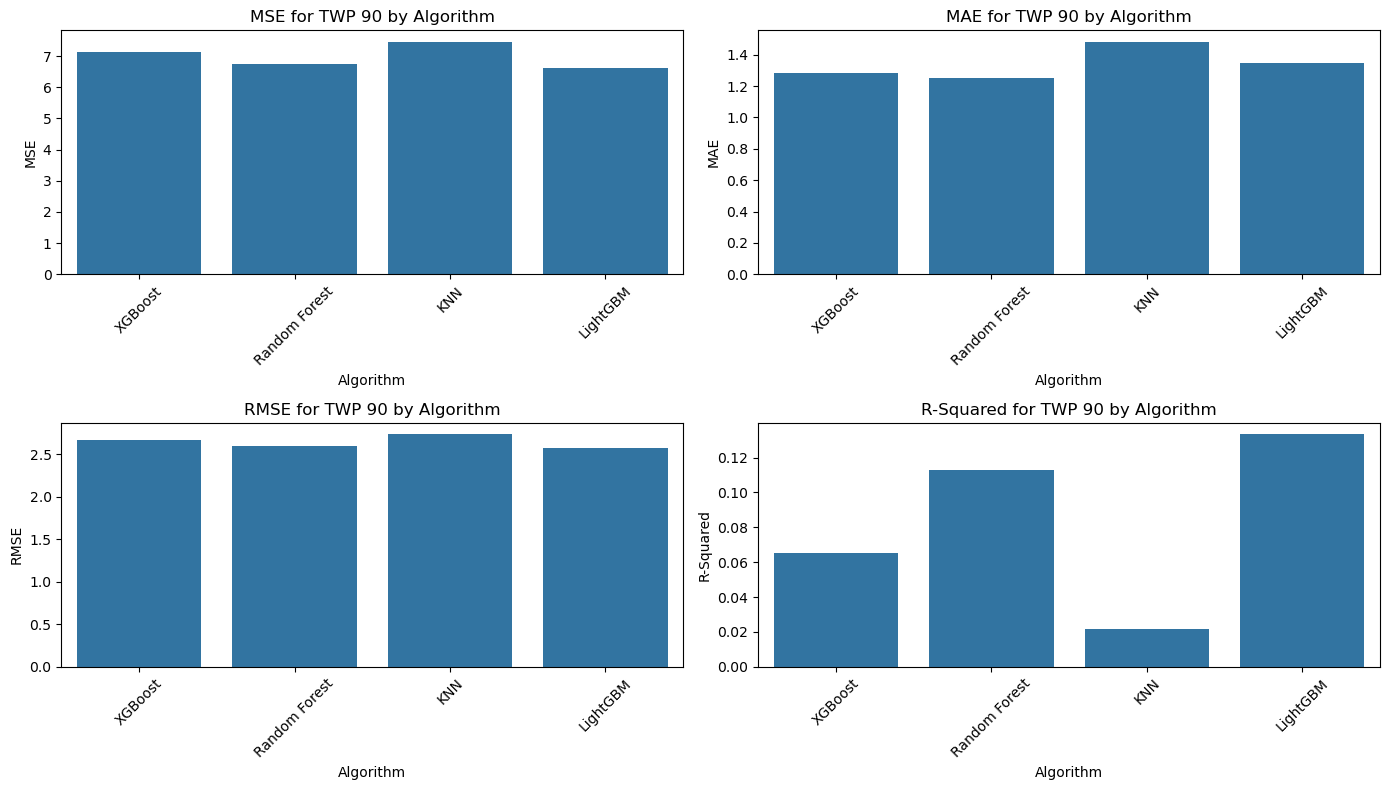

[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 1295.908519


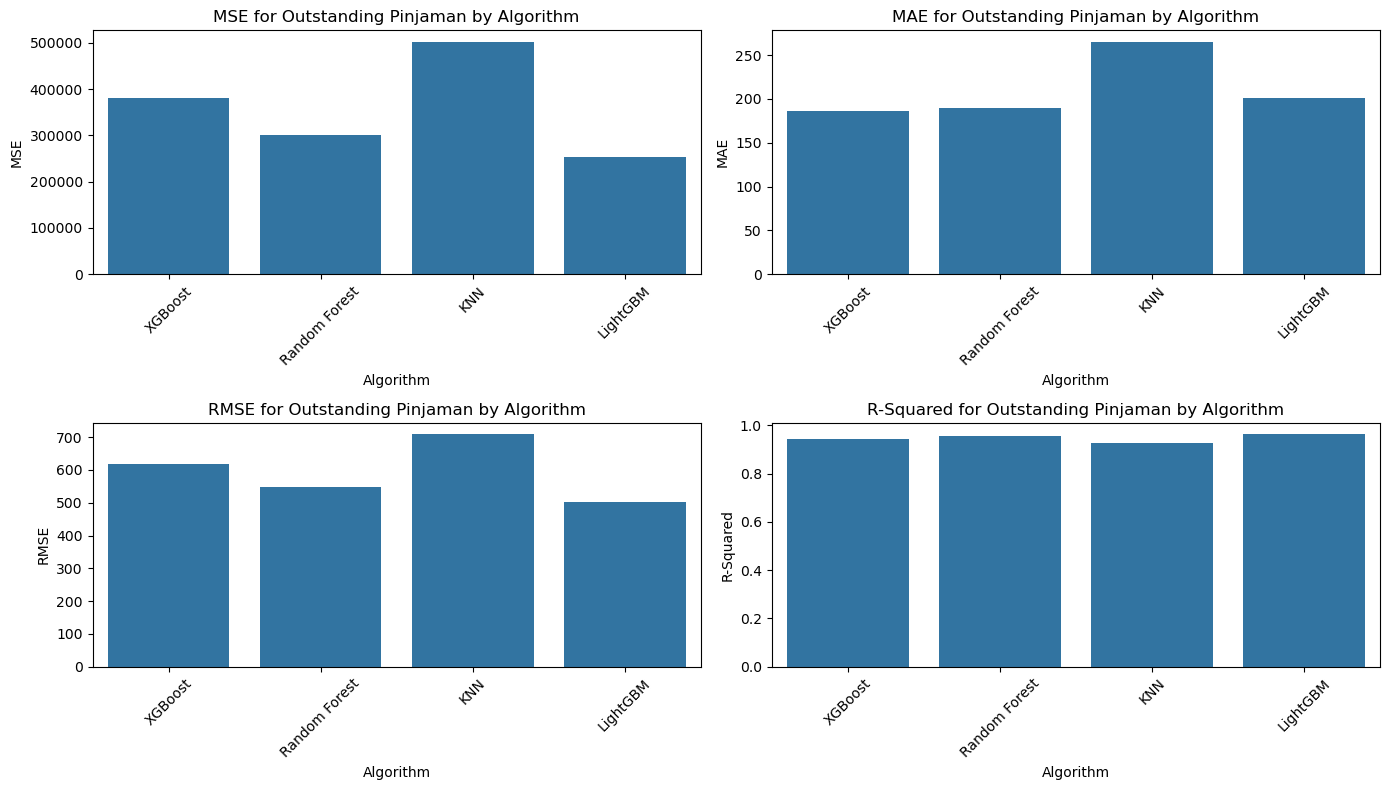

In [29]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Mengganti spasi dengan garis bawah pada kolom fitur
data.columns = data.columns.str.replace(' ', '_')

# ==============================================================
# 1. TWP 90 Evaluation
# ==============================================================

# Memilih fitur dan variabel target untuk TWP 90
X = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y = data['TWP_90']

# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hasil evaluasi untuk TWP 90
evaluation_results_twp90 = {
    'Algorithm': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R-Squared': []
}

# Model names
model_names = ['XGBoost', 'Random Forest', 'KNN', 'LightGBM']

# ==============================================================
# 1. XGBoost Model for TWP 90
# ==============================================================
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi
evaluation_results_twp90['Algorithm'].append('XGBoost')
evaluation_results_twp90['MSE'].append(mean_squared_error(y_test, y_pred_xgb))
evaluation_results_twp90['MAE'].append(mean_absolute_error(y_test, y_pred_xgb))
evaluation_results_twp90['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
evaluation_results_twp90['R-Squared'].append(r2_score(y_test, y_pred_xgb))

# ==============================================================
# 2. Random Forest Model for TWP 90
# ==============================================================
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
evaluation_results_twp90['Algorithm'].append('Random Forest')
evaluation_results_twp90['MSE'].append(mean_squared_error(y_test, y_pred_rf))
evaluation_results_twp90['MAE'].append(mean_absolute_error(y_test, y_pred_rf))
evaluation_results_twp90['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_rf)))
evaluation_results_twp90['R-Squared'].append(r2_score(y_test, y_pred_rf))

# ==============================================================
# 3. KNN Model for TWP 90
# ==============================================================
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test)

# Evaluasi
evaluation_results_twp90['Algorithm'].append('KNN')
evaluation_results_twp90['MSE'].append(mean_squared_error(y_test, y_pred_knn))
evaluation_results_twp90['MAE'].append(mean_absolute_error(y_test, y_pred_knn))
evaluation_results_twp90['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_knn)))
evaluation_results_twp90['R-Squared'].append(r2_score(y_test, y_pred_knn))

# ==============================================================
# 4. LightGBM Model for TWP 90
# ==============================================================
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, force_col_wise=True)
lgbm_model.fit(X_train, y_train)

# Prediksi
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluasi
evaluation_results_twp90['Algorithm'].append('LightGBM')
evaluation_results_twp90['MSE'].append(mean_squared_error(y_test, y_pred_lgbm))
evaluation_results_twp90['MAE'].append(mean_absolute_error(y_test, y_pred_lgbm))
evaluation_results_twp90['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
evaluation_results_twp90['R-Squared'].append(r2_score(y_test, y_pred_lgbm))

# ==============================================================
# Visualisasi Hasil Evaluasi TWP 90
# ==============================================================
df_eval_twp90 = pd.DataFrame(evaluation_results_twp90)

# Plotting the evaluation metrics for TWP 90
metrics = ['MSE', 'MAE', 'RMSE', 'R-Squared']

plt.figure(figsize=(14, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Algorithm', y=metric, data=df_eval_twp90)
    plt.title(f'{metric} for TWP 90 by Algorithm')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ==============================================================
# 2. Outstanding Pinjaman Evaluation
# ==============================================================

# Memilih fitur dan variabel target untuk Outstanding Pinjaman
X_outstanding = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'TWP_90']]
y_outstanding = data['Outstanding_Pinjaman_(miliar_Rp)']

# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train_outstanding, X_test_outstanding, y_train_outstanding, y_test_outstanding = train_test_split(
    X_outstanding, y_outstanding, test_size=0.2, random_state=42)

# Hasil evaluasi untuk Outstanding Pinjaman
evaluation_results_outstanding = {
    'Algorithm': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R-Squared': []
}

# ==============================================================
# 1. XGBoost Model for Outstanding Pinjaman
# ==============================================================
xgb_model_outstanding = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi
y_pred_outstanding_xgb = xgb_model_outstanding.predict(X_test_outstanding)

# Evaluasi
evaluation_results_outstanding['Algorithm'].append('XGBoost')
evaluation_results_outstanding['MSE'].append(mean_squared_error(y_test_outstanding, y_pred_outstanding_xgb))
evaluation_results_outstanding['MAE'].append(mean_absolute_error(y_test_outstanding, y_pred_outstanding_xgb))
evaluation_results_outstanding['RMSE'].append(np.sqrt(mean_squared_error(y_test_outstanding, y_pred_outstanding_xgb)))
evaluation_results_outstanding['R-Squared'].append(r2_score(y_test_outstanding, y_pred_outstanding_xgb))

# ==============================================================
# 2. Random Forest Model for Outstanding Pinjaman
# ==============================================================
rf_model_outstanding = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi
y_pred_outstanding_rf = rf_model_outstanding.predict(X_test_outstanding)

# Evaluasi
evaluation_results_outstanding['Algorithm'].append('Random Forest')
evaluation_results_outstanding['MSE'].append(mean_squared_error(y_test_outstanding, y_pred_outstanding_rf))
evaluation_results_outstanding['MAE'].append(mean_absolute_error(y_test_outstanding, y_pred_outstanding_rf))
evaluation_results_outstanding['RMSE'].append(np.sqrt(mean_squared_error(y_test_outstanding, y_pred_outstanding_rf)))
evaluation_results_outstanding['R-Squared'].append(r2_score(y_test_outstanding, y_pred_outstanding_rf))

# ==============================================================
# 3. KNN Model for Outstanding Pinjaman
# ==============================================================
knn_model_outstanding = KNeighborsRegressor(n_neighbors=5)
knn_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi
y_pred_outstanding_knn = knn_model_outstanding.predict(X_test_outstanding)

# Evaluasi
evaluation_results_outstanding['Algorithm'].append('KNN')
evaluation_results_outstanding['MSE'].append(mean_squared_error(y_test_outstanding, y_pred_outstanding_knn))
evaluation_results_outstanding['MAE'].append(mean_absolute_error(y_test_outstanding, y_pred_outstanding_knn))
evaluation_results_outstanding['RMSE'].append(np.sqrt(mean_squared_error(y_test_outstanding, y_pred_outstanding_knn)))
evaluation_results_outstanding['R-Squared'].append(r2_score(y_test_outstanding, y_pred_outstanding_knn))

# ==============================================================
# 4. LightGBM Model for Outstanding Pinjaman
# ==============================================================
lgbm_model_outstanding = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, force_col_wise=True)
lgbm_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi
y_pred_outstanding_lgbm = lgbm_model_outstanding.predict(X_test_outstanding)

# Evaluasi
evaluation_results_outstanding['Algorithm'].append('LightGBM')
evaluation_results_outstanding['MSE'].append(mean_squared_error(y_test_outstanding, y_pred_outstanding_lgbm))
evaluation_results_outstanding['MAE'].append(mean_absolute_error(y_test_outstanding, y_pred_outstanding_lgbm))
evaluation_results_outstanding['RMSE'].append(np.sqrt(mean_squared_error(y_test_outstanding, y_pred_outstanding_lgbm)))
evaluation_results_outstanding['R-Squared'].append(r2_score(y_test_outstanding, y_pred_outstanding_lgbm))

# ==============================================================
# Visualisasi Hasil Evaluasi Outstanding Pinjaman
# ==============================================================
df_eval_outstanding = pd.DataFrame(evaluation_results_outstanding)

# Plotting the evaluation metrics for Outstanding Pinjaman
metrics = ['MSE', 'MAE', 'RMSE', 'R-Squared']

plt.figure(figsize=(14, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Algorithm', y=metric, data=df_eval_outstanding)
    plt.title(f'{metric} for Outstanding Pinjaman by Algorithm')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



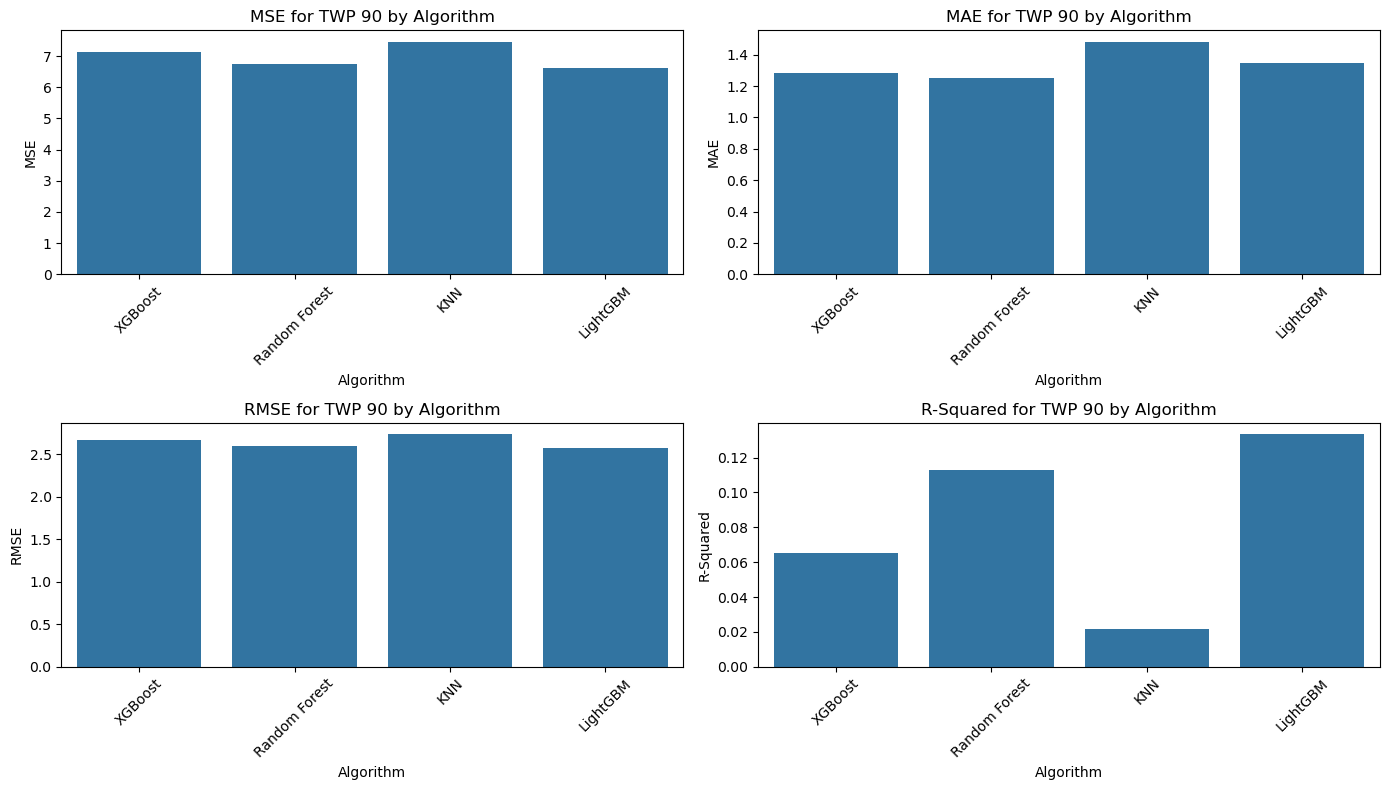

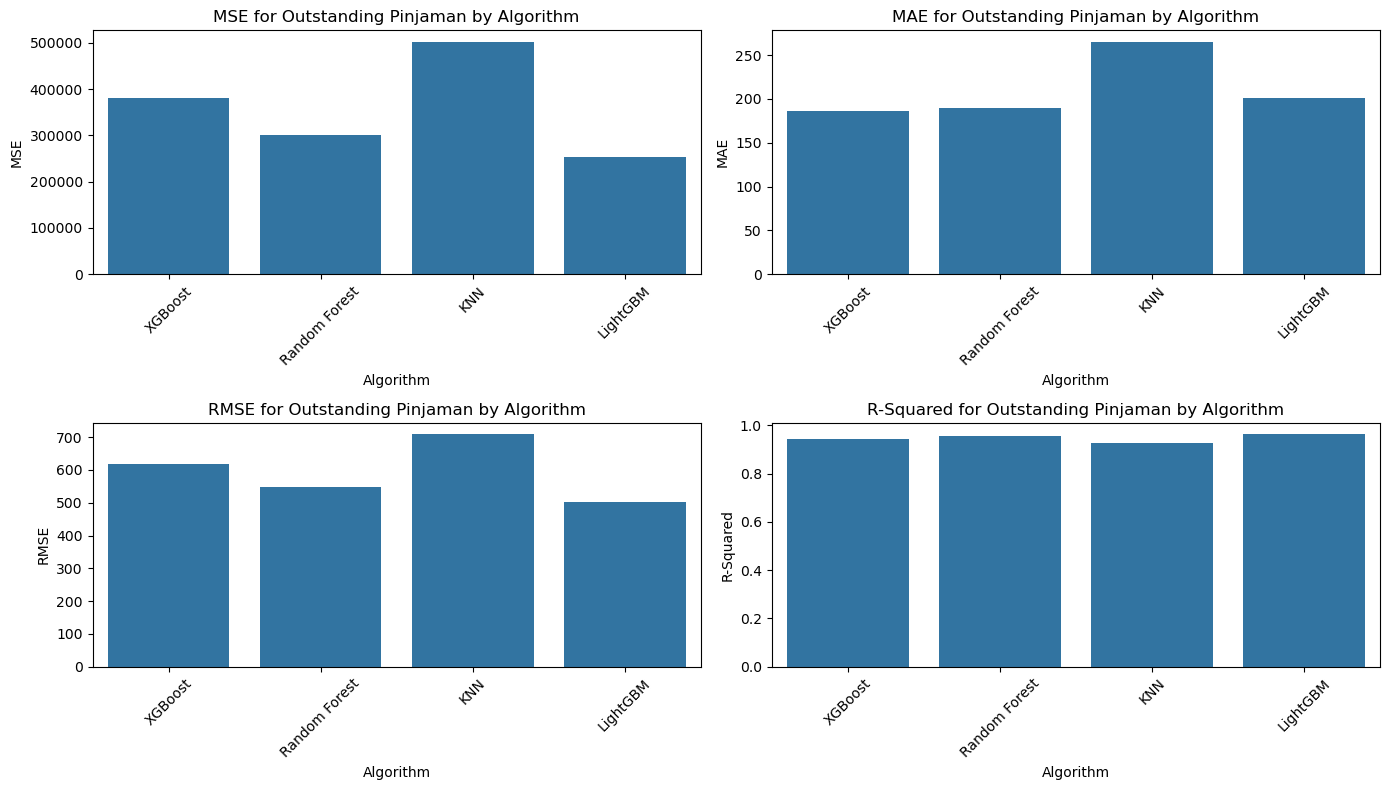

In [30]:
# ==============================================================
# Visualisasi Hasil Evaluasi TWP 90
# ==============================================================
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the evaluation metrics for TWP 90
metrics = ['MSE', 'MAE', 'RMSE', 'R-Squared']

plt.figure(figsize=(14, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Algorithm', y=metric, data=df_eval_twp90)
    plt.title(f'{metric} for TWP 90 by Algorithm')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ==============================================================
# Visualisasi Hasil Evaluasi Outstanding Pinjaman
# ==============================================================
# Plotting the evaluation metrics for Outstanding Pinjaman
metrics = ['MSE', 'MAE', 'RMSE', 'R-Squared']

plt.figure(figsize=(14, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Algorithm', y=metric, data=df_eval_outstanding)
    plt.title(f'{metric} for Outstanding Pinjaman by Algorithm')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 4.5 Analisis Hasil Evaluasi
Pada sub-bab ini, hasil evaluasi dari keempat algoritma—XGBoost, Random Forest, KNN, dan LightGBM—akan dianalisis berdasarkan metrik evaluasi yang digunakan, yaitu Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-Squared (R²). Setiap metrik ini memberikan gambaran berbeda tentang performa model dalam memprediksi TWP 90 dan Outstanding Pinjaman.

### 4.5.1 TWP 90
Berikut adalah hasil evaluasi untuk prediksi TWP 90:

Algoritma	MSE	MAE	RMSE	R-Squared
XGBoost	7.123	1.284	2.669	0.065
Random Forest	6.767	1.252	2.601	0.112
KNN	7.457	1.482	2.731	0.022
LightGBM	6.607	1.347	2.570	0.133
XGBoost:

1. MAE (1.284) dan MSE (7.123) menunjukkan tingkat error rata-rata yang relatif kecil, tetapi nilai R-Squared (0.065) rendah, yang menunjukkan bahwa model ini kurang mampu menjelaskan variasi dalam data. Hal ini menunjukkan bahwa meskipun XGBoost akurat dalam rata-rata prediksi, kemampuan model ini untuk menangkap kompleksitas pola yang lebih dalam masih terbatas.
Random Forest:

2. Model ini memiliki performa yang lebih baik dari XGBoost dengan MAE (1.252) dan MSE (6.767) yang lebih rendah. R-Squared (0.112) menunjukkan bahwa model ini lebih baik dalam menjelaskan variasi dalam data, meskipun masih belum optimal. Random Forest memberikan keseimbangan yang baik antara kesalahan rata-rata yang rendah dan kemampuan untuk menangkap pola dalam data.
KNN:

3. KNN menunjukkan performa yang paling buruk dengan MAE (1.482) dan MSE (7.457) yang lebih tinggi dibandingkan dengan model lain. R-Squared (0.022) yang sangat rendah mengindikasikan bahwa KNN tidak mampu menangkap pola yang signifikan dalam data. Model ini kurang cocok untuk prediksi variabel kompleks seperti TWP 90 dalam penelitian ini.
LightGBM:

4. LightGBM menunjukkan performa terbaik dengan MAE (1.347) dan MSE (6.607) yang lebih rendah dibandingkan dengan semua model lainnya. R-Squared (0.133) tertinggi menunjukkan bahwa LightGBM mampu menjelaskan variasi dalam data dengan lebih baik. Dengan demikian, LightGBM menjadi algoritma paling optimal untuk prediksi TWP 90 dalam penelitian ini.


### 4.5.2 Outstanding Pinjaman
Berikut adalah hasil evaluasi untuk prediksi Outstanding Pinjaman:

Algoritma	MSE	MAE	RMSE	R-Squared
XGBoost	381739.77	186.23	617.85	0.943
Random Forest	300405.39	190.27	548.09	0.955
KNN	501820.10	265.06	708.39	0.925
LightGBM	253471.69	201.03	503.46	0.962
XGBoost:

1. XGBoost menunjukkan hasil yang cukup baik dengan MSE (381739.77) dan MAE (186.23), namun nilai R-Squared (0.943) menunjukkan bahwa model ini mampu menjelaskan sekitar 94.3% dari variasi dalam data. Meski begitu, LightGBM dan Random Forest menunjukkan hasil yang lebih baik secara keseluruhan.
Random Forest:

2. Random Forest memiliki performa yang lebih baik dari XGBoost dalam hal MSE (300405.39) dan RMSE (548.09). Selain itu, R-Squared (0.955) menunjukkan kemampuan yang lebih baik dalam menjelaskan variasi dalam data, menjadikannya model yang lebih handal dibandingkan XGBoost untuk prediksi Outstanding Pinjaman.
KNN:

3. KNN kembali menunjukkan performa yang paling buruk dengan MSE (501820.10) dan MAE (265.06) yang jauh lebih tinggi dari model lainnya. R-Squared (0.925) juga merupakan yang terendah di antara semua model. Seperti pada prediksi TWP 90, KNN terbukti tidak efektif dalam menangani dataset dengan kompleksitas tinggi seperti ini.
LightGBM:

4. LightGBM memiliki performa terbaik dengan MSE (253471.69), RMSE (503.46), dan R-Squared (0.962). Ini menunjukkan bahwa LightGBM tidak hanya unggul dalam hal akurasi prediksi tetapi juga dalam menangkap variasi dalam data dengan lebih baik. Dengan nilai R-Squared mendekati 1, model ini memberikan prediksi yang paling akurat untuk Outstanding Pinjaman.


### Kesimpulan dari Hasil Evaluasi
Berdasarkan analisis hasil evaluasi di atas, LightGBM adalah algoritma yang paling optimal baik untuk prediksi TWP 90 maupun Outstanding Pinjaman. Algoritma ini menunjukkan performa terbaik dalam hal semua metrik evaluasi (MSE, MAE, RMSE, dan R-Squared). Random Forest juga menunjukkan performa yang baik, tetapi tidak sebaik LightGBM. Sementara itu, XGBoost berada di posisi menengah dengan performa yang cukup baik, namun masih kurang optimal dibandingkan dua algoritma lainnya. KNN secara konsisten menunjukkan hasil yang paling buruk, menandakan bahwa model ini tidak cocok untuk menangani prediksi pada dataset ini yang kompleks.

# 4.6 Pembahasan
Penelitian ini menggunakan kombinasi algoritma Prophet dan beberapa algoritma machine learning seperti XGBoost, Random Forest, KNN, dan LightGBM untuk memodelkan prediksi Outstanding Pinjaman dan TWP 90 dalam konteks platform P2P lending di Indonesia. Kombinasi ini dipilih untuk mengeksplorasi kemampuan Prophet dalam menangkap tren jangka panjang, sementara algoritma machine learning digunakan untuk memodelkan faktor-faktor prediktif yang lebih kompleks dan variabel non-linear. Dalam konteks P2P lending, pendekatan ini menawarkan keunggulan yang dapat menangkap baik pola musiman yang bersifat makro maupun hubungan non-linear antar variabel yang memengaruhi pinjaman serta risiko keterlambatan pembayaran.

Algoritma Prophet, yang merupakan algoritma time series berbasis regresi aditif, terbukti efektif dalam memodelkan tren jangka panjang Outstanding Pinjaman dan TWP 90. Prophet mampu mengidentifikasi tren musiman dan tahunan, yang merupakan karakteristik utama dari pinjaman dalam platform P2P lending yang kerap dipengaruhi oleh siklus ekonomi dan kebijakan. Prophet menghasilkan prediksi yang stabil untuk Outstanding Pinjaman, yang menunjukkan peningkatan bertahap dari 2021 hingga 2025. Ini mengindikasikan bahwa platform P2P lending di Indonesia akan terus berkembang dan menunjukkan permintaan pinjaman yang meningkat. Untuk prediksi TWP 90, Prophet juga mampu menangkap penurunan tajam dalam keterlambatan pembayaran pada awal periode, yang dapat dikaitkan dengan peningkatan manajemen risiko dan kebijakan pengendalian kredit pada platform tersebut. Namun, Prophet juga memiliki keterbatasan dalam menangani variabel yang lebih kompleks dengan hubungan non-linear. Keterbatasan ini mendorong penggunaan algoritma machine learning untuk memperkuat prediksi, terutama ketika berhadapan dengan data yang lebih bervariasi dan heterogen.

Penggunaan algoritma machine learning seperti XGBoost, Random Forest, KNN, dan LightGBM memberikan pendekatan tambahan yang lebih kuat dalam memodelkan data yang kompleks. XGBoost secara khusus unggul dalam menangani data yang memiliki banyak fitur dan relasi yang non-linear. Pada prediksi TWP 90, XGBoost menunjukkan performa yang cukup baik dengan nilai MSE dan MAE yang rendah, namun nilai R-Squared yang tidak terlalu tinggi menunjukkan bahwa meskipun model ini memiliki tingkat akurasi prediksi yang baik, ia kurang mampu menjelaskan variasi data secara mendalam. Hal ini juga berlaku untuk prediksi Outstanding Pinjaman, di mana XGBoost menunjukkan performa yang solid dengan R-Squared sebesar 0.943, yang berarti model mampu menjelaskan sebagian besar variansi dari data.

Random Forest menawarkan stabilitas dan ketahanan yang lebih baik dalam menangani variabilitas data. Untuk prediksi TWP 90, Random Forest memiliki MSE yang sedikit lebih rendah dibandingkan XGBoost dan R-Squared yang lebih tinggi, menunjukkan bahwa model ini mampu menangkap hubungan antara variabel input dan output dengan lebih baik. Pada prediksi Outstanding Pinjaman, Random Forest juga menunjukkan hasil yang unggul, dengan MSE lebih rendah dan R-Squared sebesar 0.955, yang mengindikasikan kemampuan model dalam menangani data yang lebih kompleks.

KNN memiliki performa yang lebih rendah dibandingkan algoritma lainnya. Hal ini terlihat dari MSE dan MAE yang lebih tinggi untuk prediksi TWP 90 maupun Outstanding Pinjaman, serta R-Squared yang sangat rendah. KNN, yang merupakan algoritma sederhana berbasis jarak, tidak dapat menangkap pola yang lebih kompleks dalam dataset ini. Performanya yang rendah disebabkan oleh karakteristik algoritma KNN yang lebih cocok untuk dataset yang lebih kecil dan kurang bervariasi, berbeda dengan dataset yang digunakan dalam penelitian ini yang bersifat heterogen.

Terakhir, LightGBM menunjukkan performa terbaik dalam penelitian ini. Pada prediksi TWP 90, LightGBM menghasilkan nilai MSE dan MAE yang paling rendah, serta R-Squared tertinggi (0.133). Ini menunjukkan bahwa LightGBM mampu menangani data yang lebih besar dan lebih kompleks dengan baik. Untuk prediksi Outstanding Pinjaman, LightGBM juga menunjukkan performa yang sangat kuat dengan R-Squared sebesar 0.962, yang berarti bahwa model ini mampu menjelaskan hampir seluruh variabilitas data. LightGBM, dengan pendekatan gradient boosting yang efisien dan kemampuannya menangani dataset besar, memberikan hasil prediksi yang lebih cepat dan akurat.

Secara keseluruhan, kombinasi Prophet dan algoritma machine learning terbukti efektif dalam penelitian ini. Prophet memberikan gambaran makro terkait tren jangka panjang, sedangkan machine learning memberikan analisis yang lebih rinci mengenai faktor risiko spesifik yang mempengaruhi TWP 90 dan Outstanding Pinjaman. Pendekatan ini memberikan wawasan yang lebih mendalam dan prediksi yang lebih akurat bagi lender dan platform P2P lending dalam mengelola risiko kredit dan mengambil keputusan strategis terkait penyaluran pinjaman.

## 4.6.1 Implikasi Penelitian
Implikasi dari penelitian ini sangat signifikan bagi sektor P2P lending di Indonesia. Pertama, model prediksi yang dikembangkan dalam penelitian ini dapat digunakan oleh platform P2P lending untuk mengantisipasi tren pertumbuhan pinjaman di masa depan. Peningkatan prediksi yang diberikan oleh Prophet menunjukkan bahwa Outstanding Pinjaman akan terus meningkat hingga pertengahan 2025, yang mengindikasikan bahwa platform P2P lending harus siap untuk mengelola pertumbuhan ini. Dengan pemahaman yang lebih baik tentang proyeksi jangka panjang, platform dapat merancang strategi alokasi sumber daya yang lebih efektif dan menyesuaikan kebijakan pemberian pinjaman untuk meminimalkan risiko kredit.

Kedua, implikasi terkait dengan TWP 90 memberikan wawasan tentang risiko keterlambatan pembayaran dalam platform. Model prediksi yang akurat memungkinkan lender untuk mengantisipasi periode risiko yang lebih tinggi, misalnya ketika prediksi menunjukkan lonjakan TWP 90 di masa mendatang. Dengan demikian, lender dapat menerapkan langkah-langkah mitigasi risiko yang lebih proaktif, seperti peningkatan syarat kredit atau pengawasan yang lebih ketat terhadap peminjam dengan risiko tinggi. Hal ini dapat mengurangi potensi kerugian dan meningkatkan stabilitas platform P2P lending.

Selain itu, hasil penelitian ini juga memberikan implikasi penting bagi regulator dan pembuat kebijakan di sektor fintech. Dengan pemahaman yang lebih baik tentang faktor-faktor yang memengaruhi TWP 90 dan Outstanding Pinjaman, regulator dapat merancang kebijakan yang lebih tepat sasaran untuk mendukung pertumbuhan industri fintech sambil mengurangi risiko kredit yang berlebihan. Ini dapat mencakup penerapan kebijakan yang mendorong manajemen risiko yang lebih baik pada platform P2P lending atau memberikan insentif bagi lender yang menerapkan langkah-langkah mitigasi risiko yang lebih kuat.

Terakhir, dari sisi pengembangan teknologi, penelitian ini juga menunjukkan potensi penggunaan algoritma machine learning yang lebih maju seperti LightGBM dan XGBoost dalam konteks fintech. Penggunaan teknologi ini dapat membantu meningkatkan akurasi prediksi risiko kredit, yang pada akhirnya dapat meningkatkan kepercayaan investor dan lender terhadap platform P2P lending. Dengan adanya prediksi yang lebih akurat, platform dapat memperbaiki proses pemberian pinjaman, mengoptimalkan portofolio kredit, dan mengurangi tingkat wanprestasi yang terjadi di masa mendatang.

Secara keseluruhan, penelitian ini memberikan kontribusi penting dalam literatur fintech lending dengan menawarkan pendekatan prediksi yang lebih cerdas dan berbasis data untuk meningkatkan efisiensi dan efektivitas manajemen risiko di platform P2P lending di Indonesia.

# 5. Kesimpulan dan Saran

## 5.1 Kesimpulan

Kesimpulan
Terkait penggunaan algoritma Prophet untuk memodelkan prediksi tren jangka panjang: Algoritma Prophet berhasil memodelkan tren jangka panjang pada P2P lending di Indonesia, khususnya dalam hal outstanding penyaluran pinjaman dan TWP 90. Hasilnya menunjukkan tren peningkatan yang stabil pada outstanding pinjaman, serta fluktuasi pada TWP 90 yang mencerminkan risiko keterlambatan pembayaran kredit. Prophet memberikan proyeksi yang jelas tentang tren masa depan berdasarkan data historis, membantu memprediksi potensi pertumbuhan pasar dan risiko kredit jangka panjang.

Kinerja algoritma machine learning dalam memprediksi faktor-faktor yang mempengaruhi outstanding penyaluran pinjaman dan TWP 90: Dari hasil evaluasi, algoritma LightGBM memberikan kinerja terbaik dalam memprediksi outstanding pinjaman dan TWP 90, dengan nilai MAE, MSE, RMSE, dan R-Squared yang paling rendah. XGBoost juga memberikan hasil yang kompetitif dalam memprediksi outstanding pinjaman, sedangkan Random Forest dan KNN cenderung memiliki performa yang lebih rendah, terutama dalam memprediksi TWP 90. Ini menunjukkan bahwa LightGBM dan XGBoost lebih efektif dalam menangani kompleksitas data P2P lending di Indonesia dibandingkan algoritma lain.

## 5.2 Saran
Platform P2P Lending: Disarankan untuk mengadopsi algoritma Prophet dalam memprediksi tren jangka panjang untuk perencanaan strategis dan pengelolaan risiko. Selain itu, integrasi algoritma LightGBM dapat membantu meningkatkan akurasi dalam memprediksi risiko kredit dan outstanding pinjaman, sehingga platform dapat merancang strategi mitigasi risiko yang lebih baik.

Lender dan Investor: Lender dapat memanfaatkan hasil prediksi dari algoritma Prophet dan LightGBM untuk mengambil keputusan yang lebih bijaksana terkait penyaluran dana, terutama dengan mempertimbangkan prediksi tren outstanding pinjaman dan risiko TWP 90 di masa depan.

Regulator dan OJK (Otoritas Jasa Keuangan): Regulator dapat menggunakan hasil prediksi ini sebagai dasar dalam merumuskan kebijakan yang lebih tepat guna mengurangi risiko kredit di sektor P2P lending. Pemahaman yang lebih baik tentang tren jangka panjang dan risiko keterlambatan pembayaran dapat membantu regulator mengawasi industri ini dengan lebih efektif.

Peneliti dan Akademisi: Studi ini dapat dikembangkan lebih lanjut dengan memperluas variabel prediktor dan mencoba algoritma machine learning lainnya. Hal ini dapat memperkaya literatur terkait prediksi risiko di industri fintech dan meningkatkan akurasi model dalam memprediksi tren pasar dan risiko kredit di masa depan.